In [16]:
## Data Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
df = pd.read_csv("Data.csv")

In [5]:
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [6]:
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [7]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

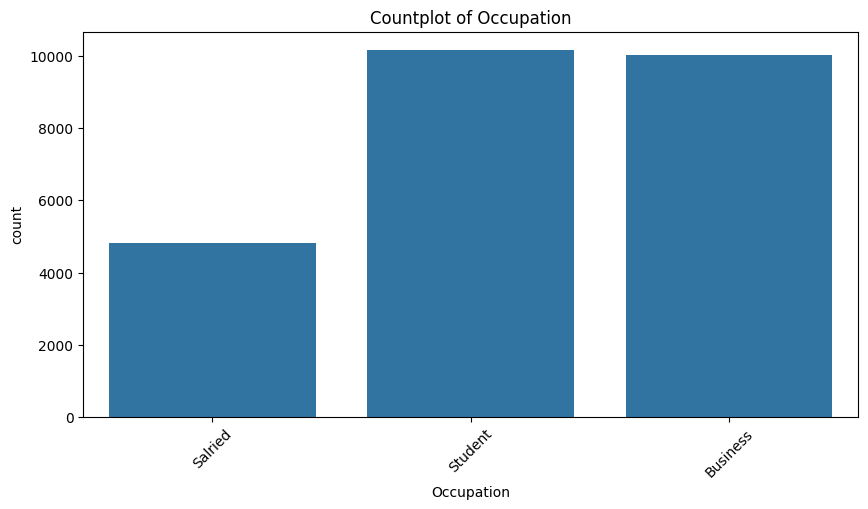

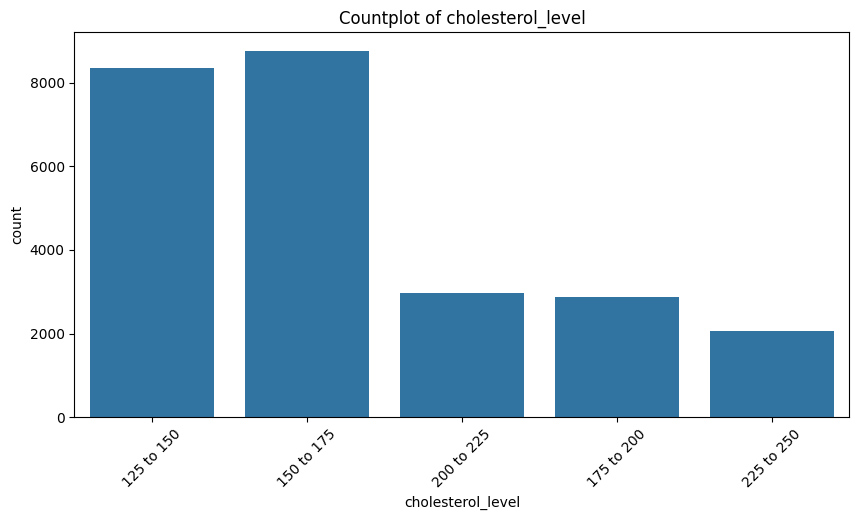

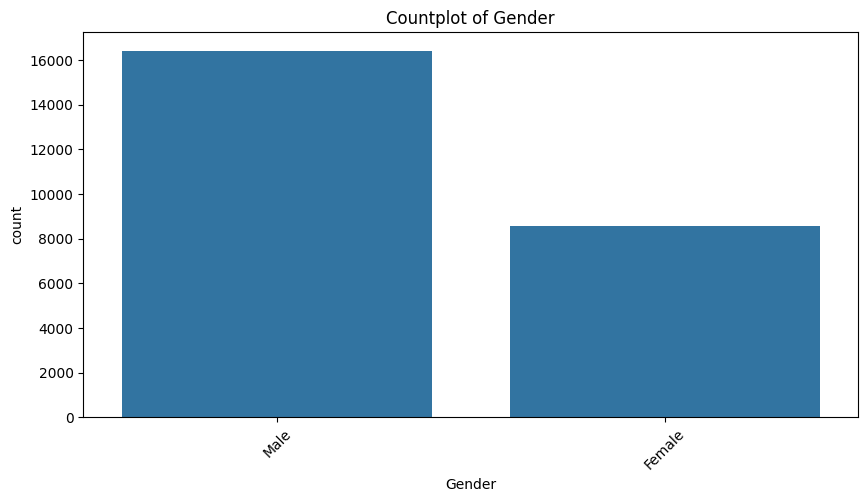

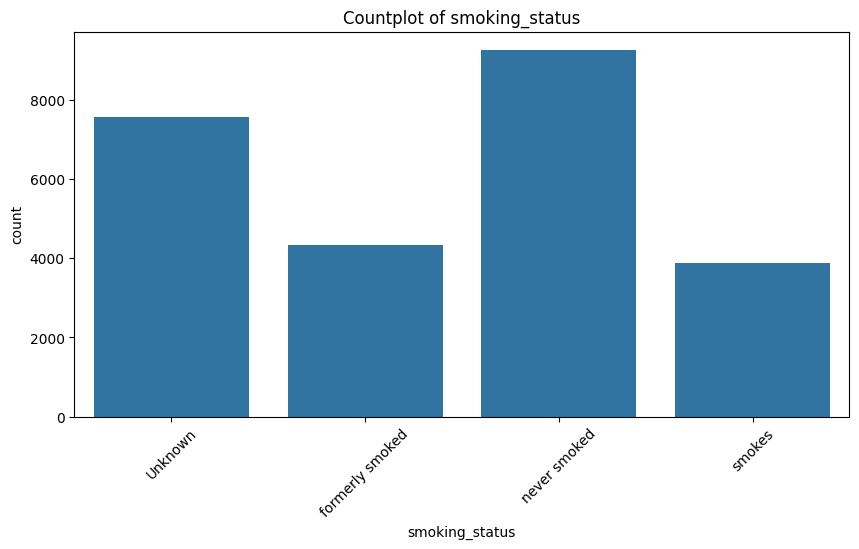

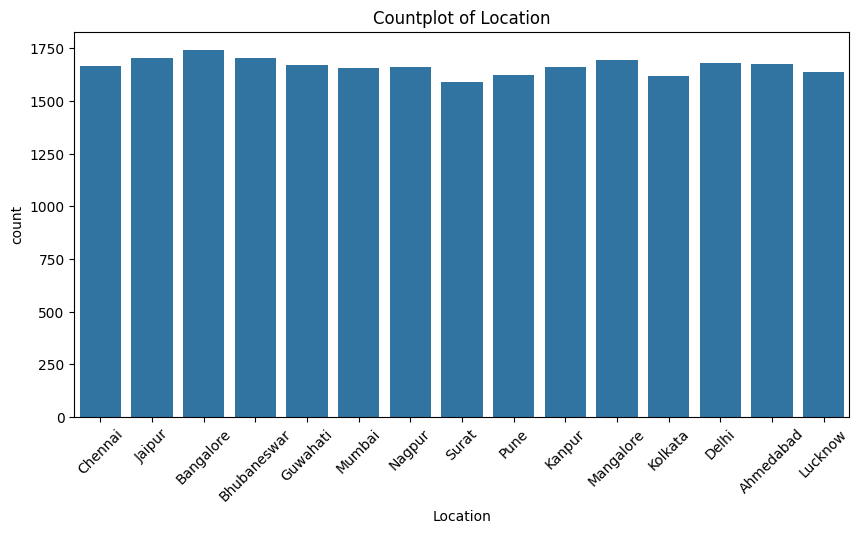

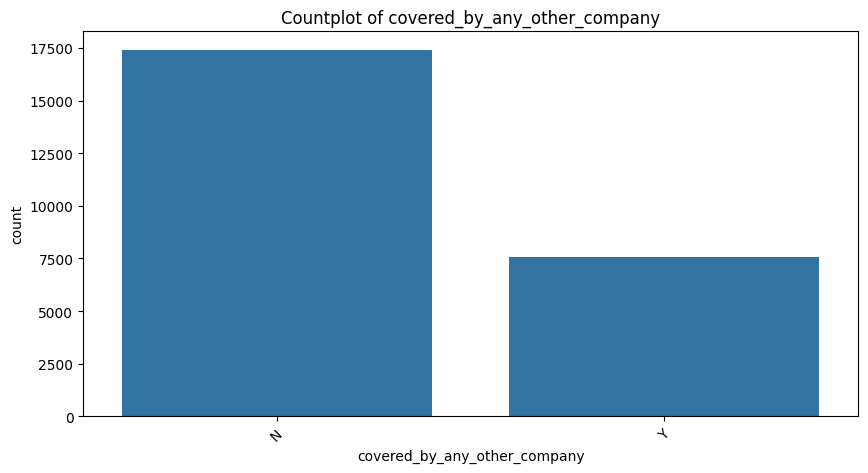

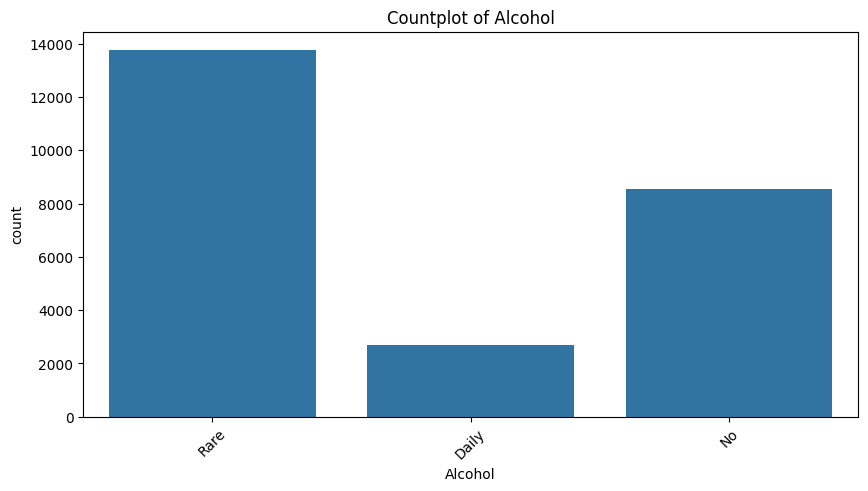

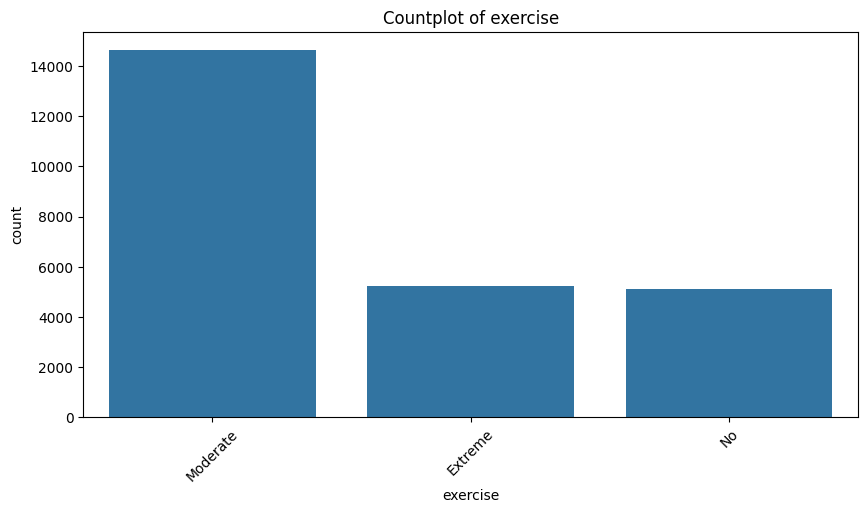

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    plt.show()

In [10]:
target = "insurance_cost"    

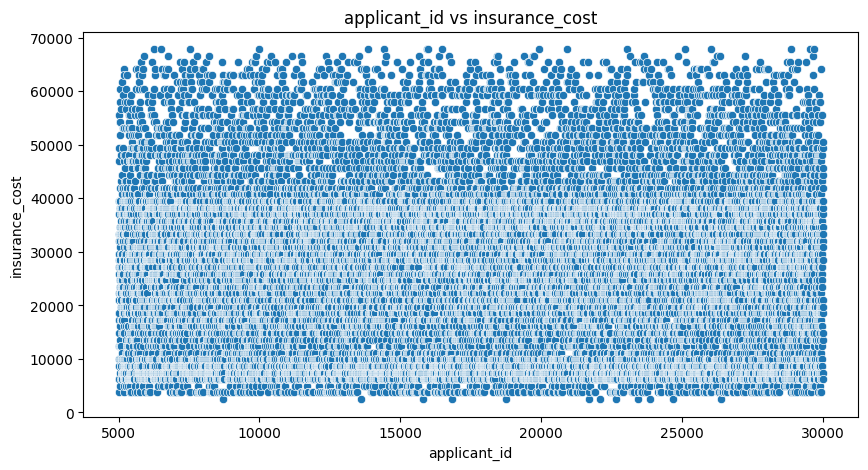

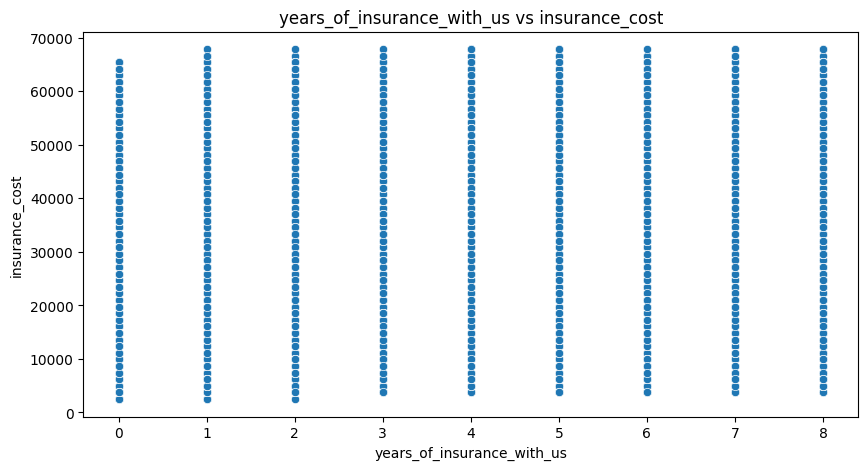

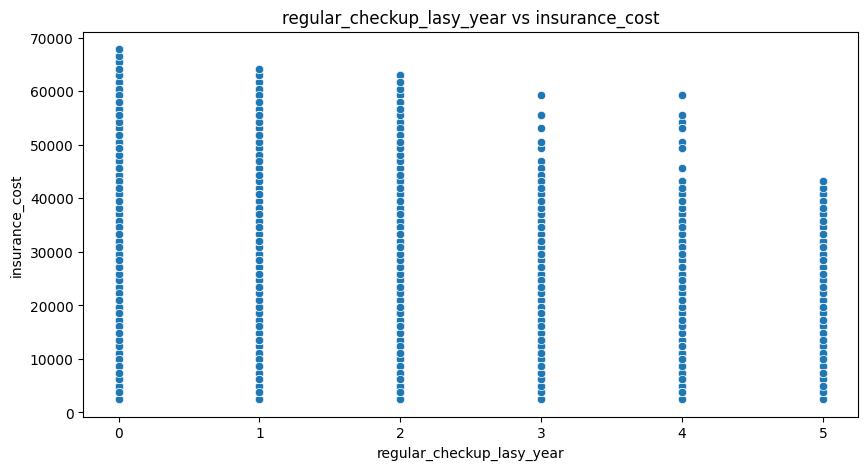

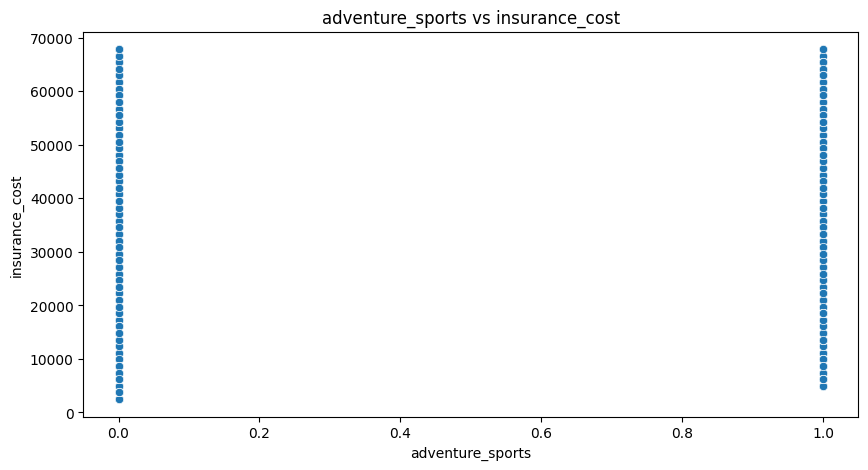

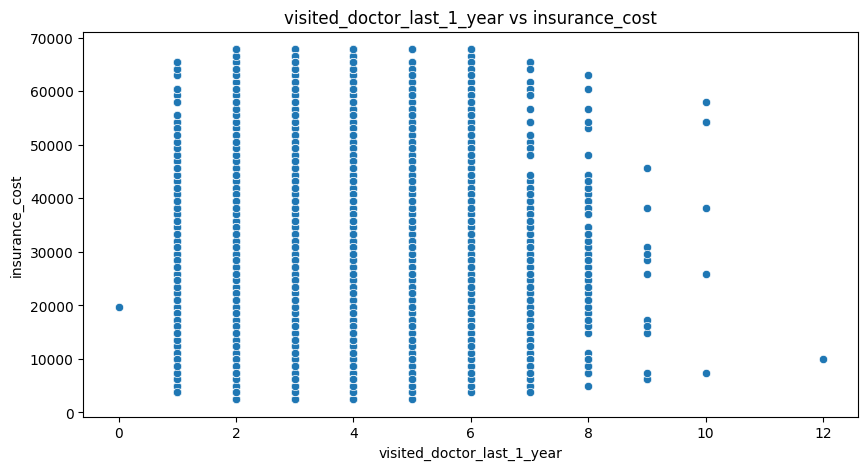

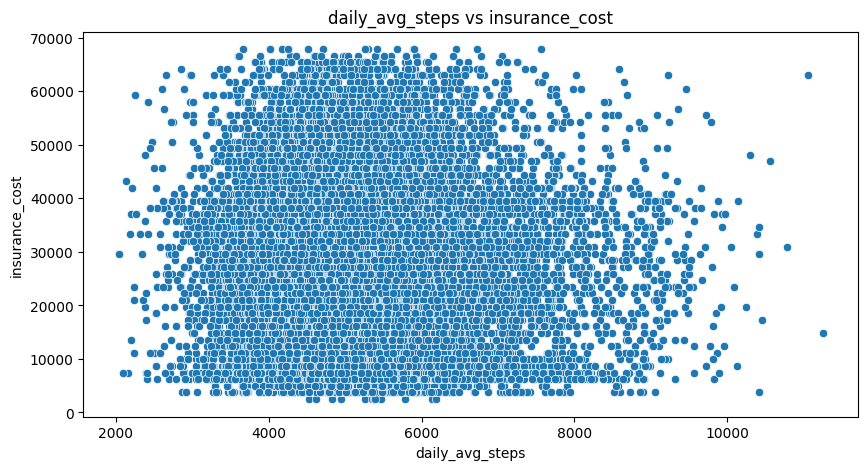

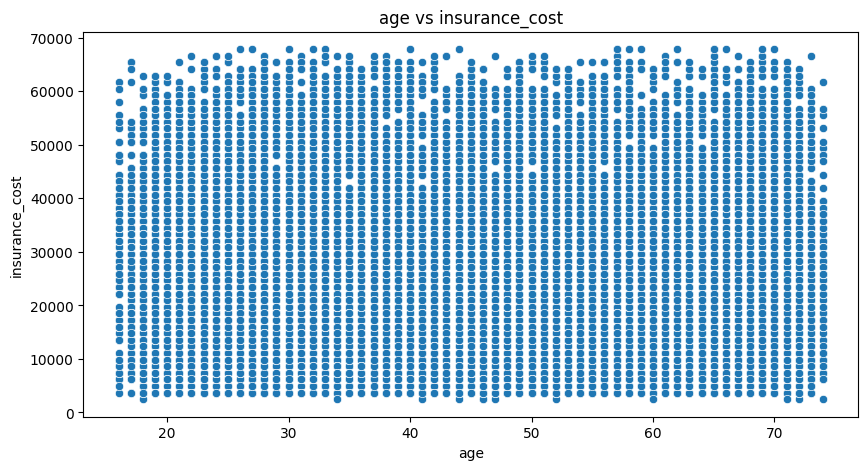

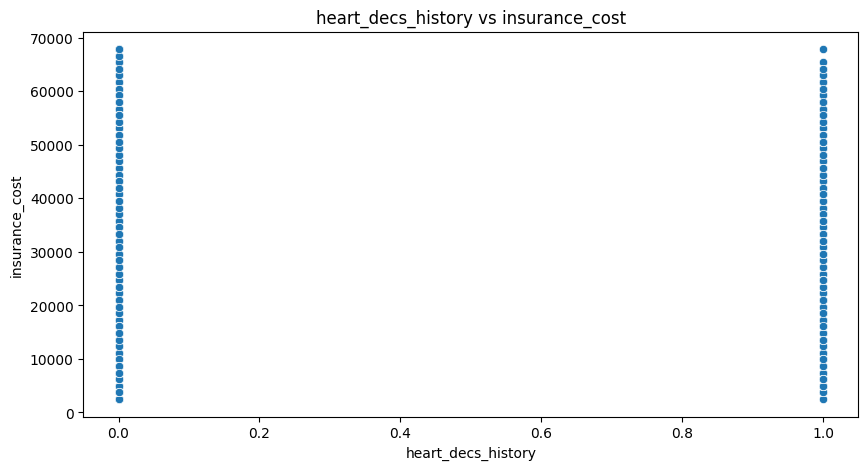

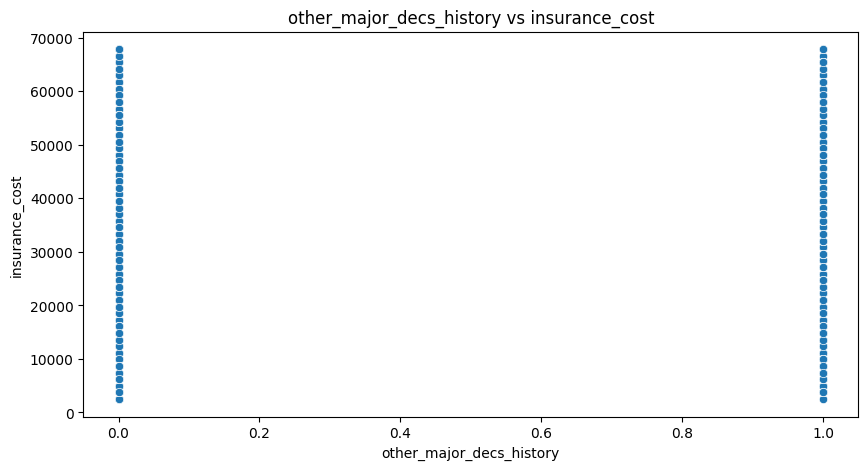

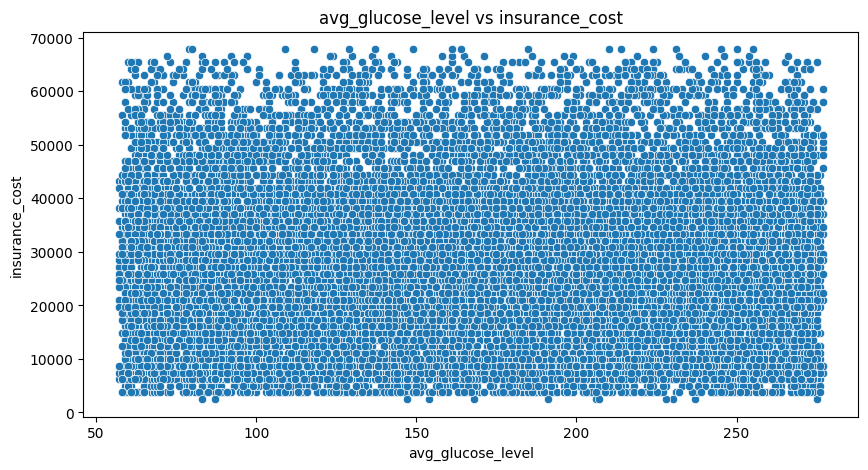

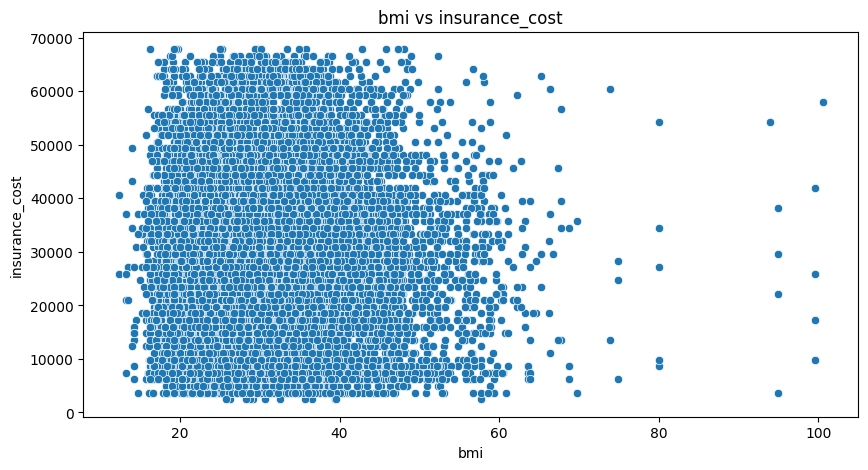

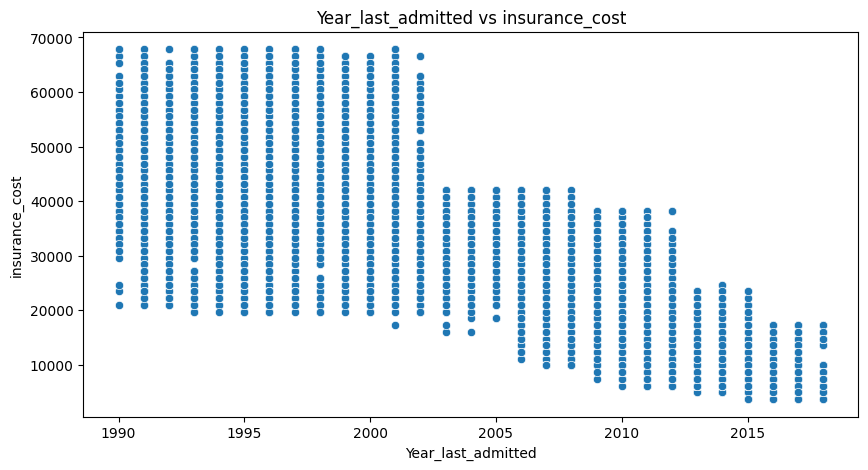

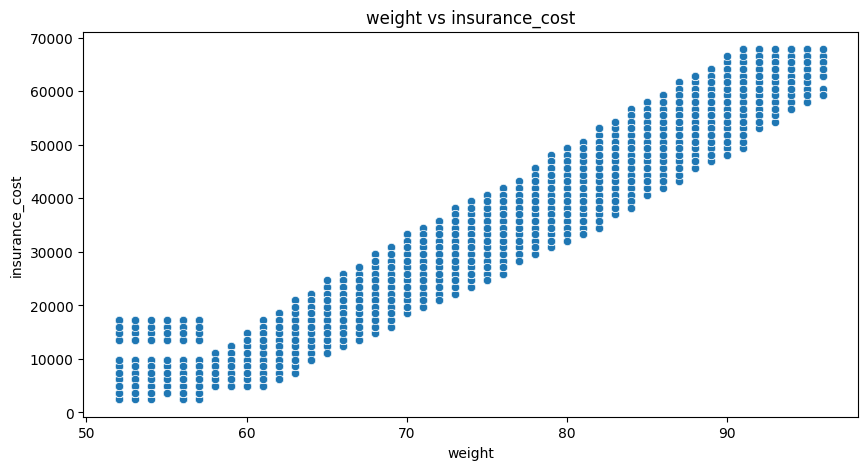

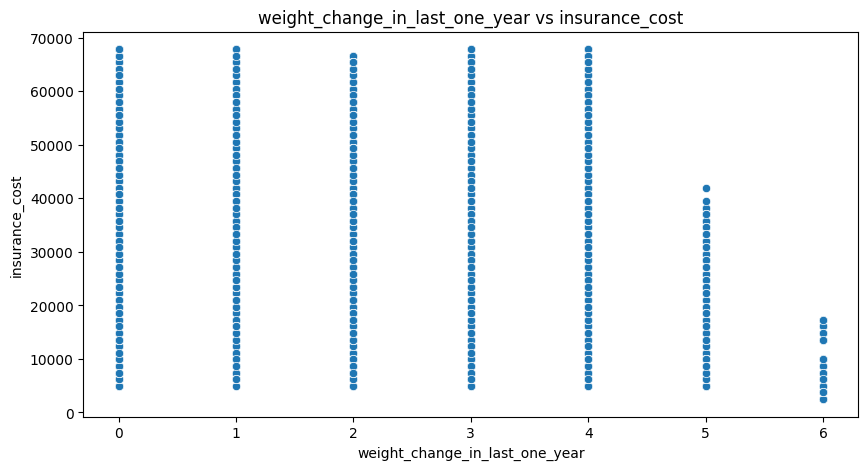

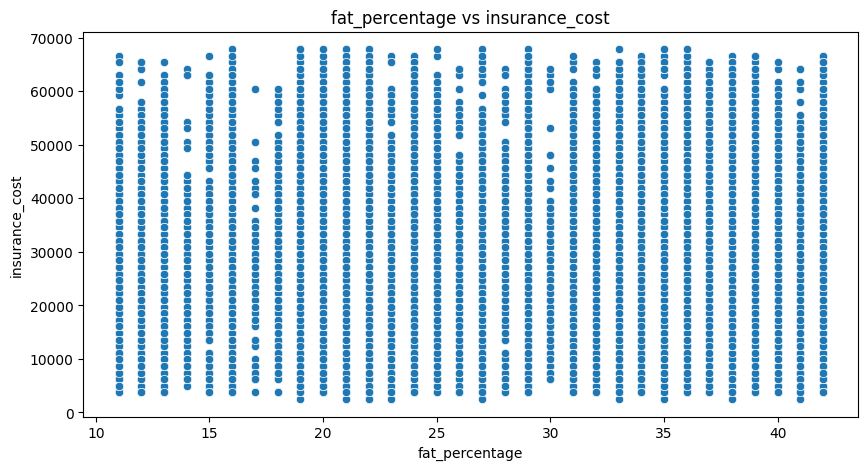

In [ ]:
# Scatter plots for numerical columns vs target
for col in num_cols:
    if col != target:
        plt.figure()
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()

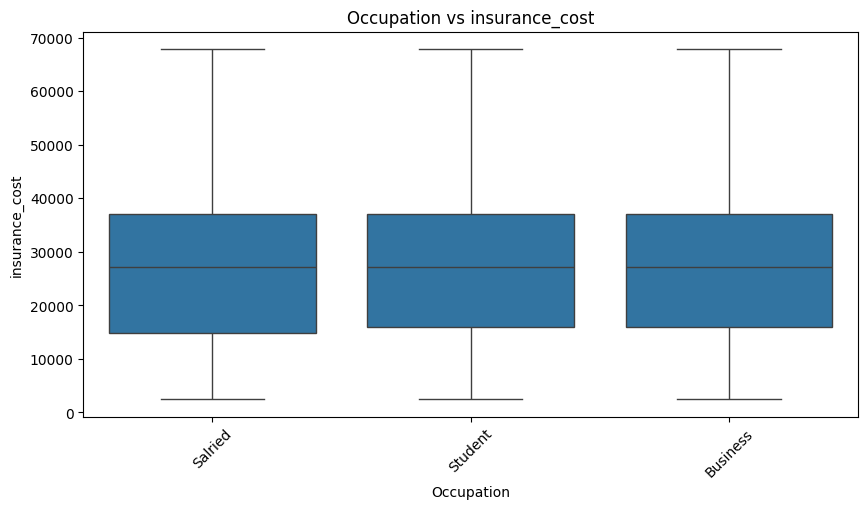

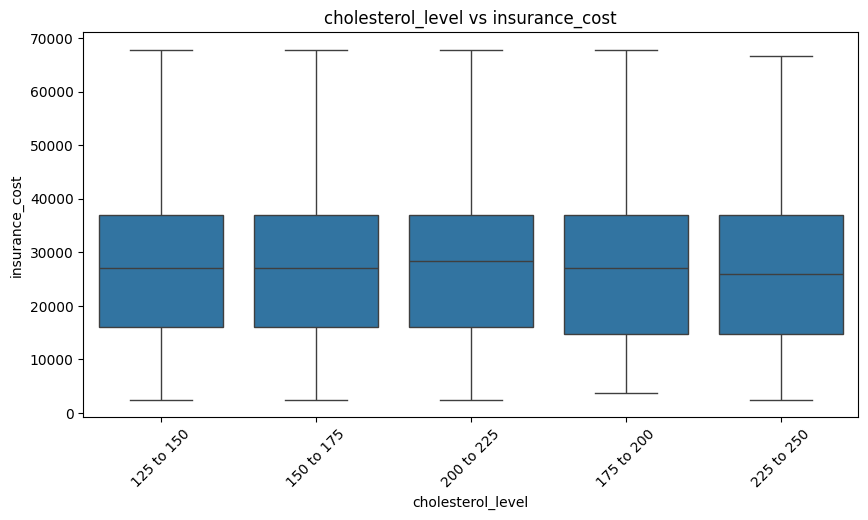

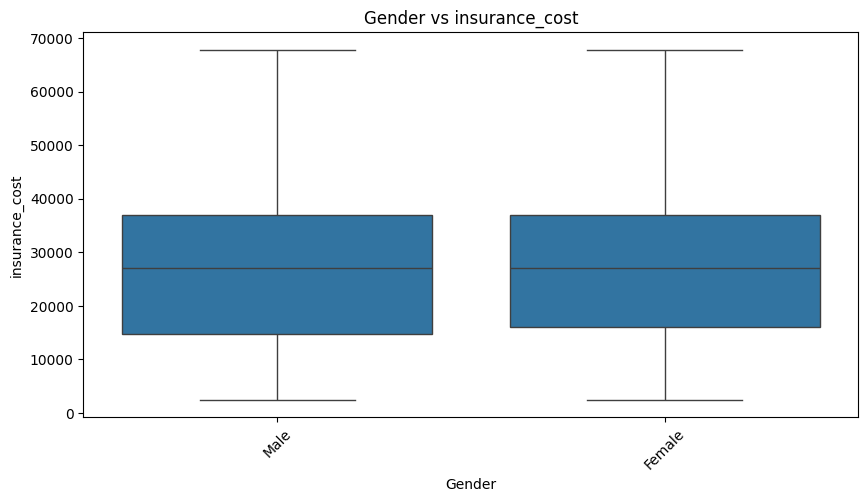

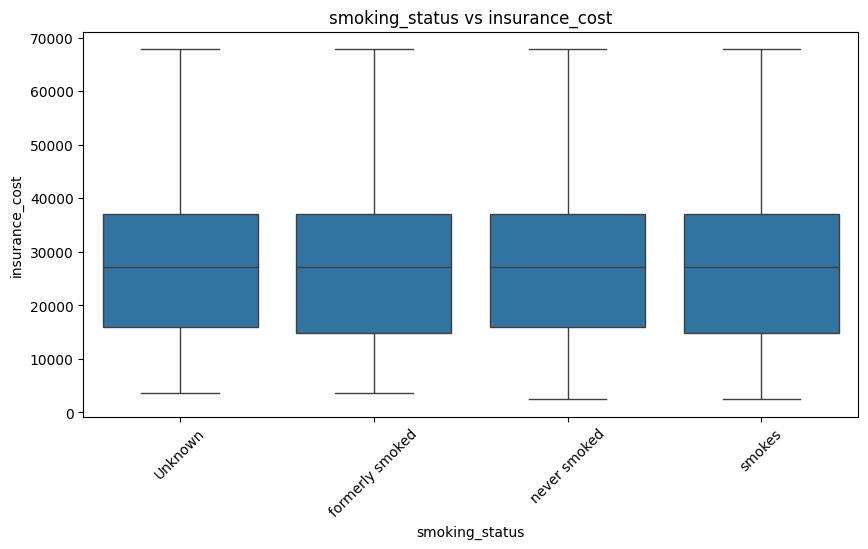

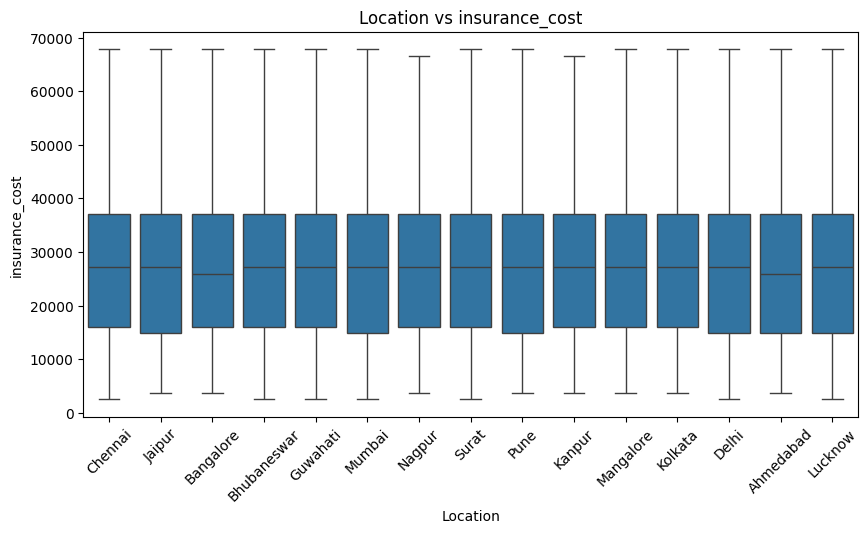

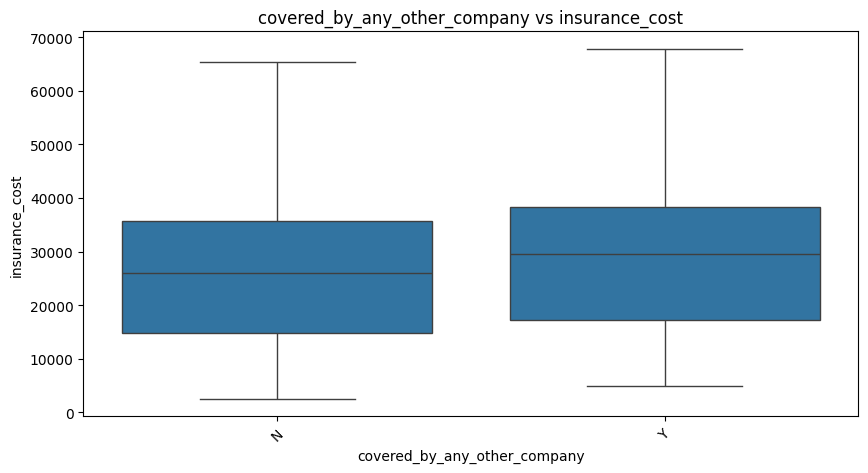

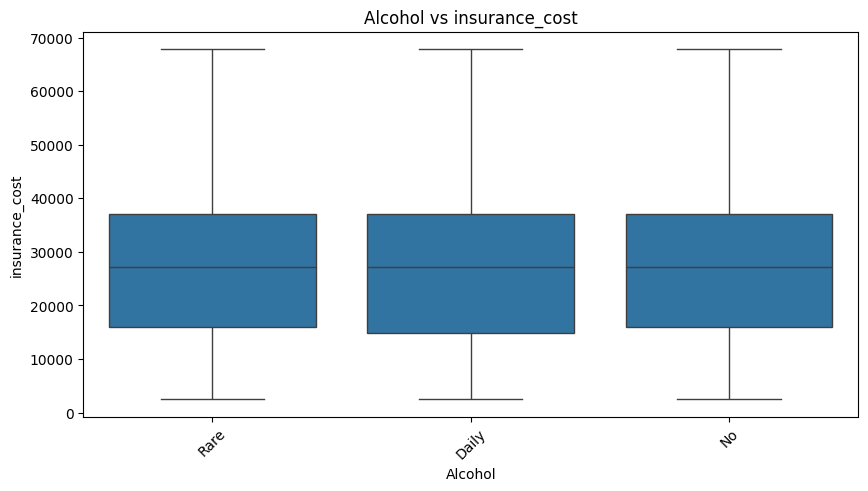

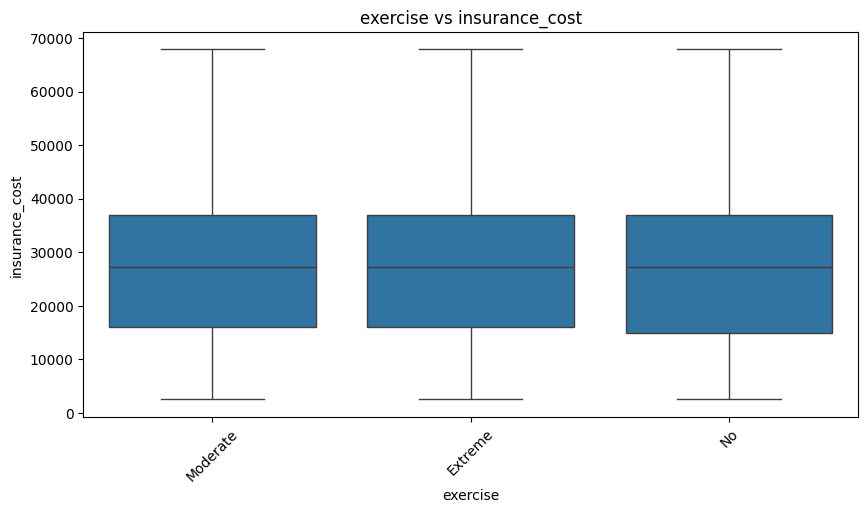

In [12]:
# Boxplots for categorical columns vs target
for col in cat_cols:
    plt.figure()
    sns.boxplot(data=df, x=col, y=target)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target}")
    plt.show()


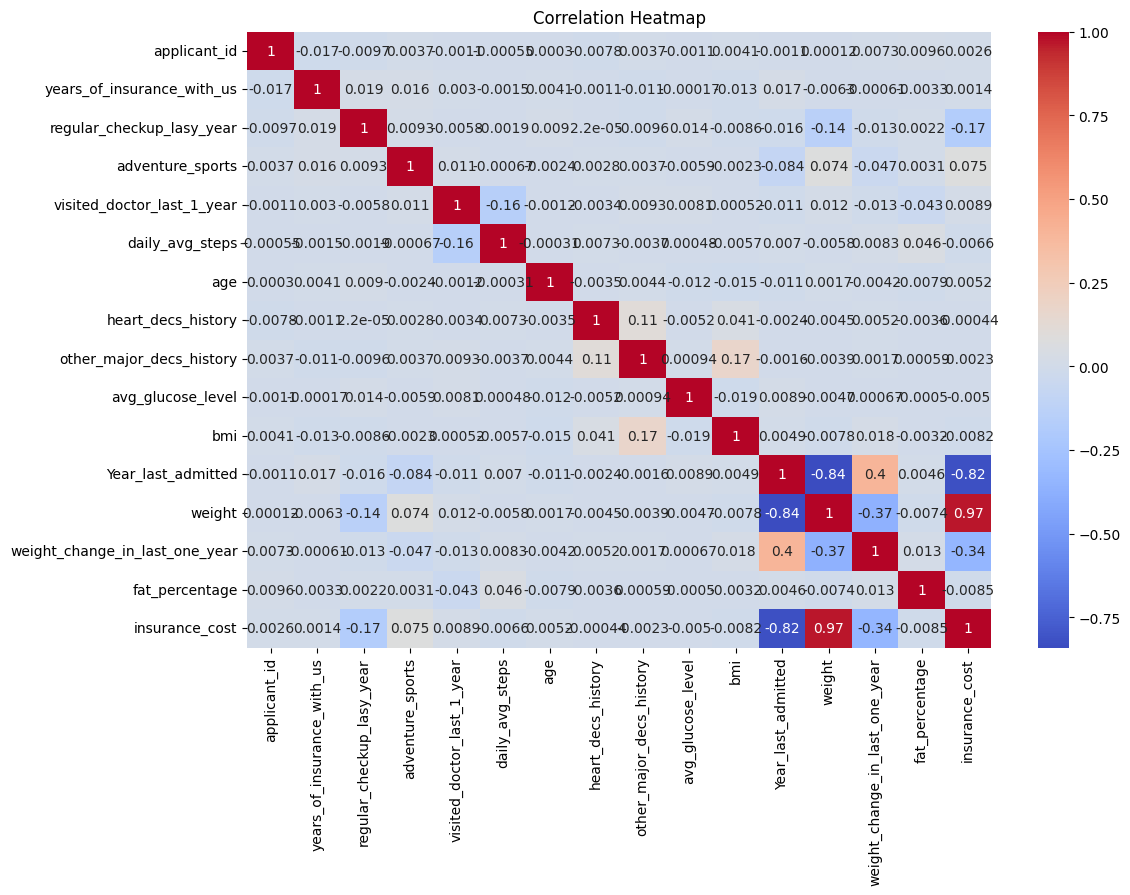

In [13]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

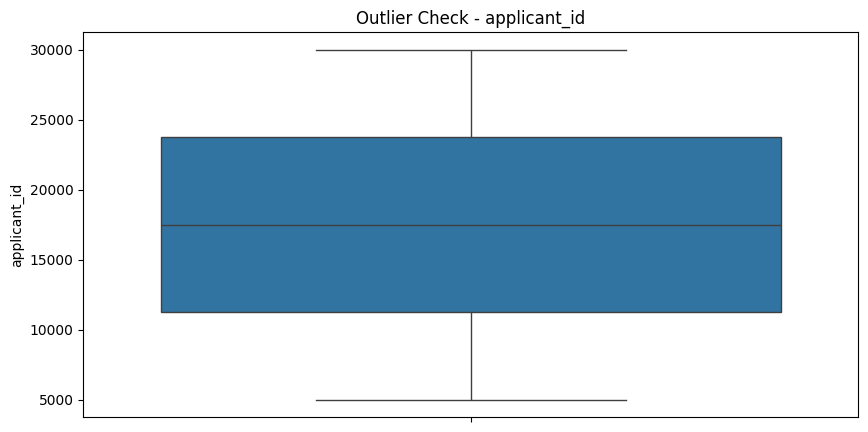

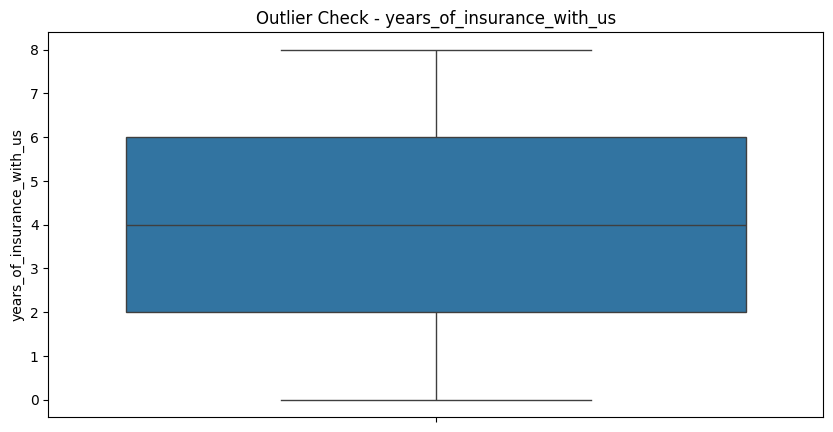

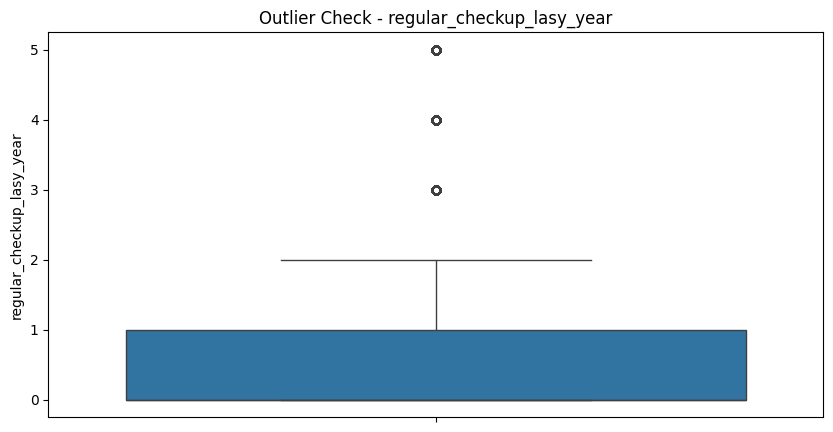

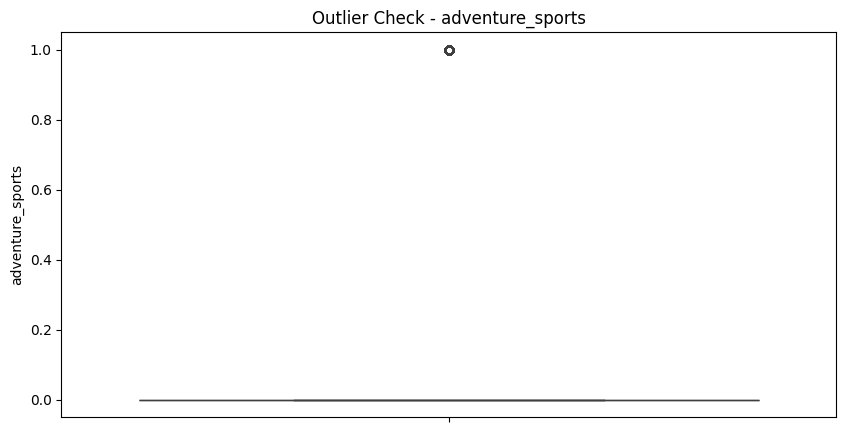

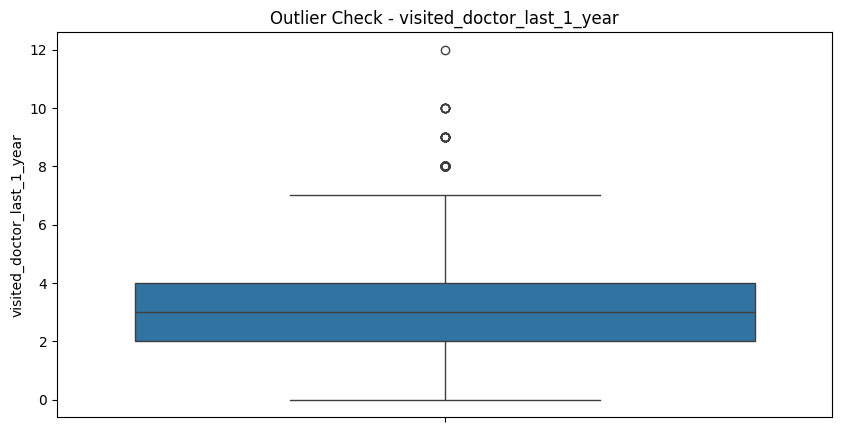

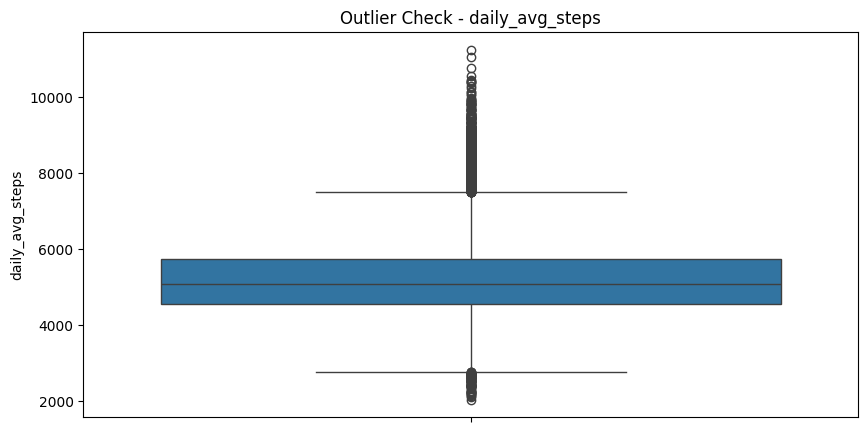

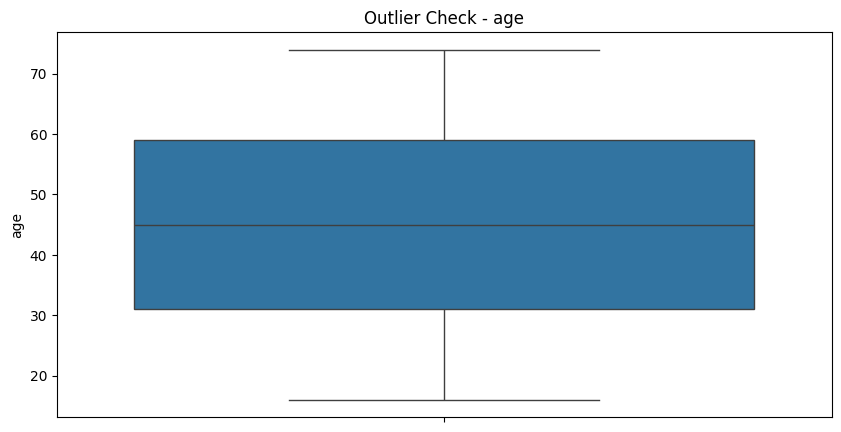

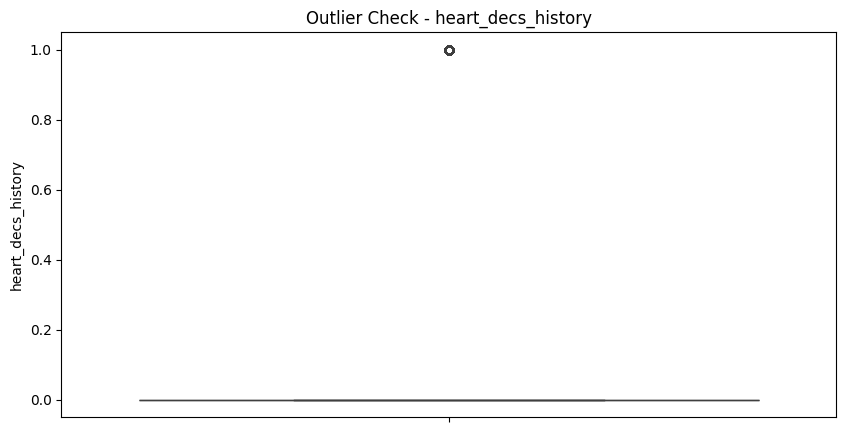

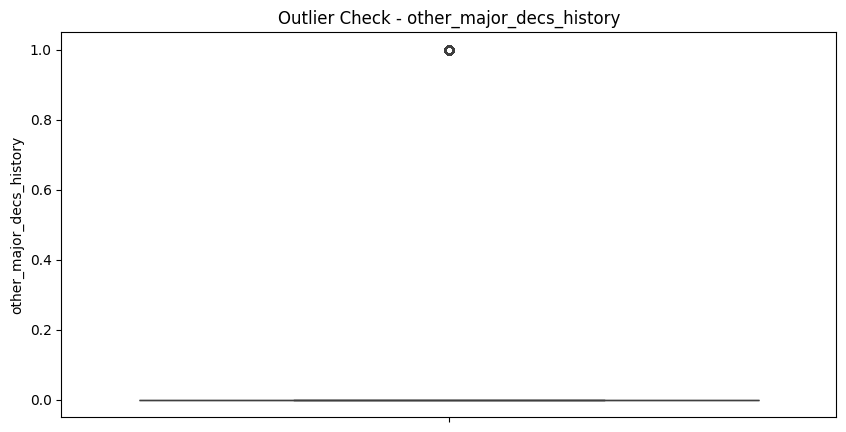

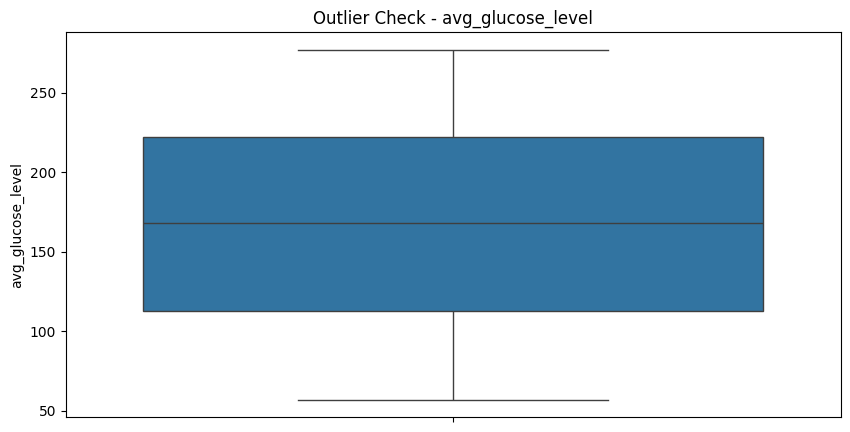

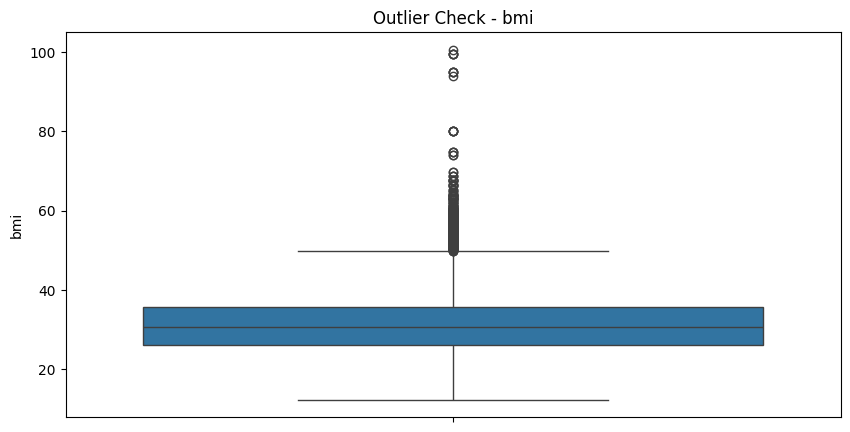

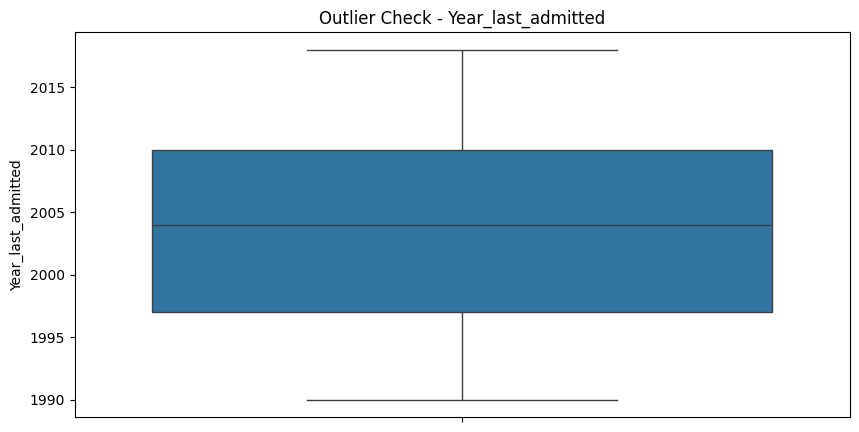

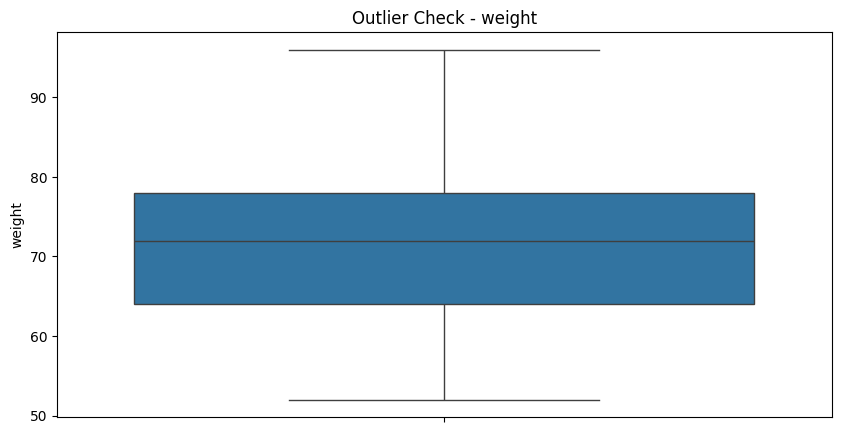

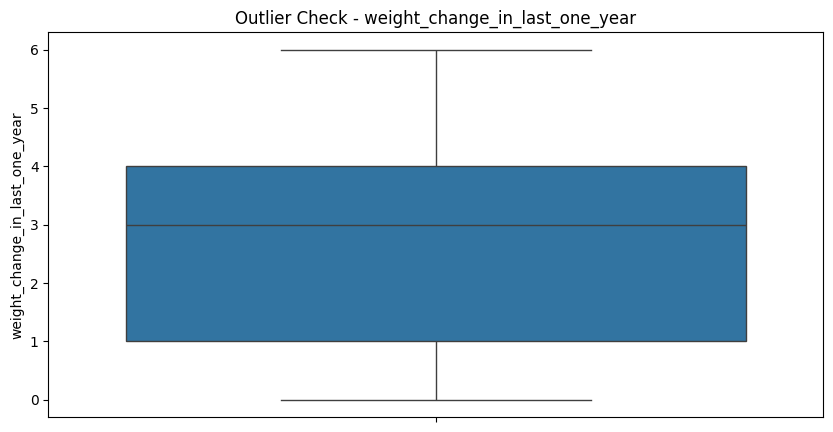

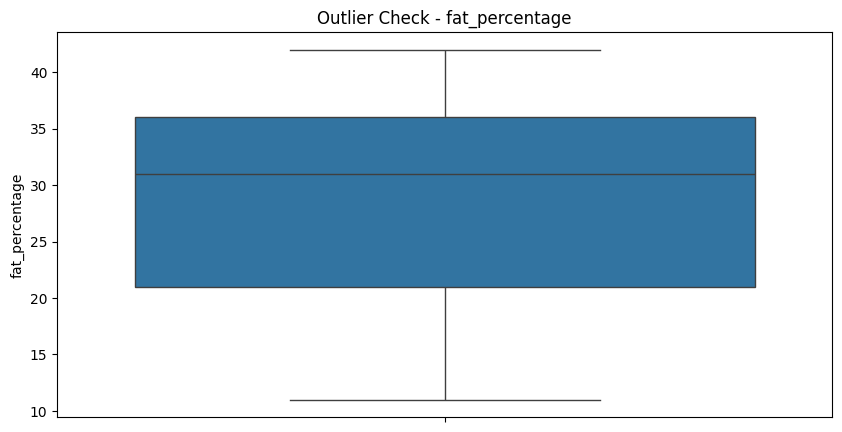

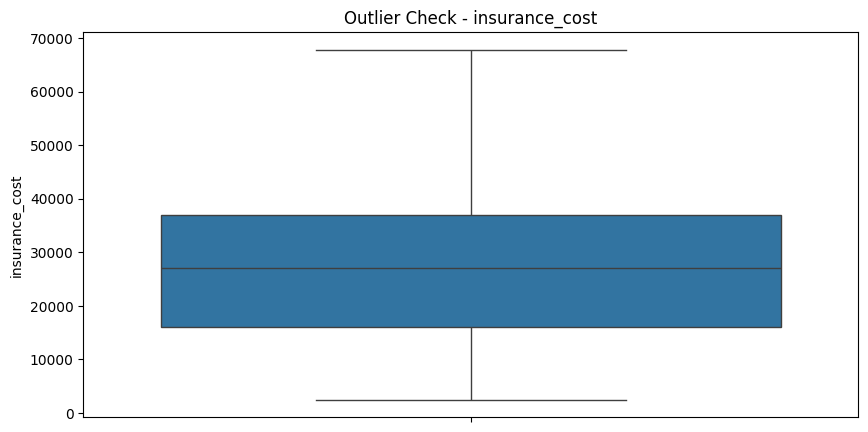

In [14]:
# Outlier Detection using Boxplots

for col in num_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f"Outlier Check - {col}")
    plt.show()

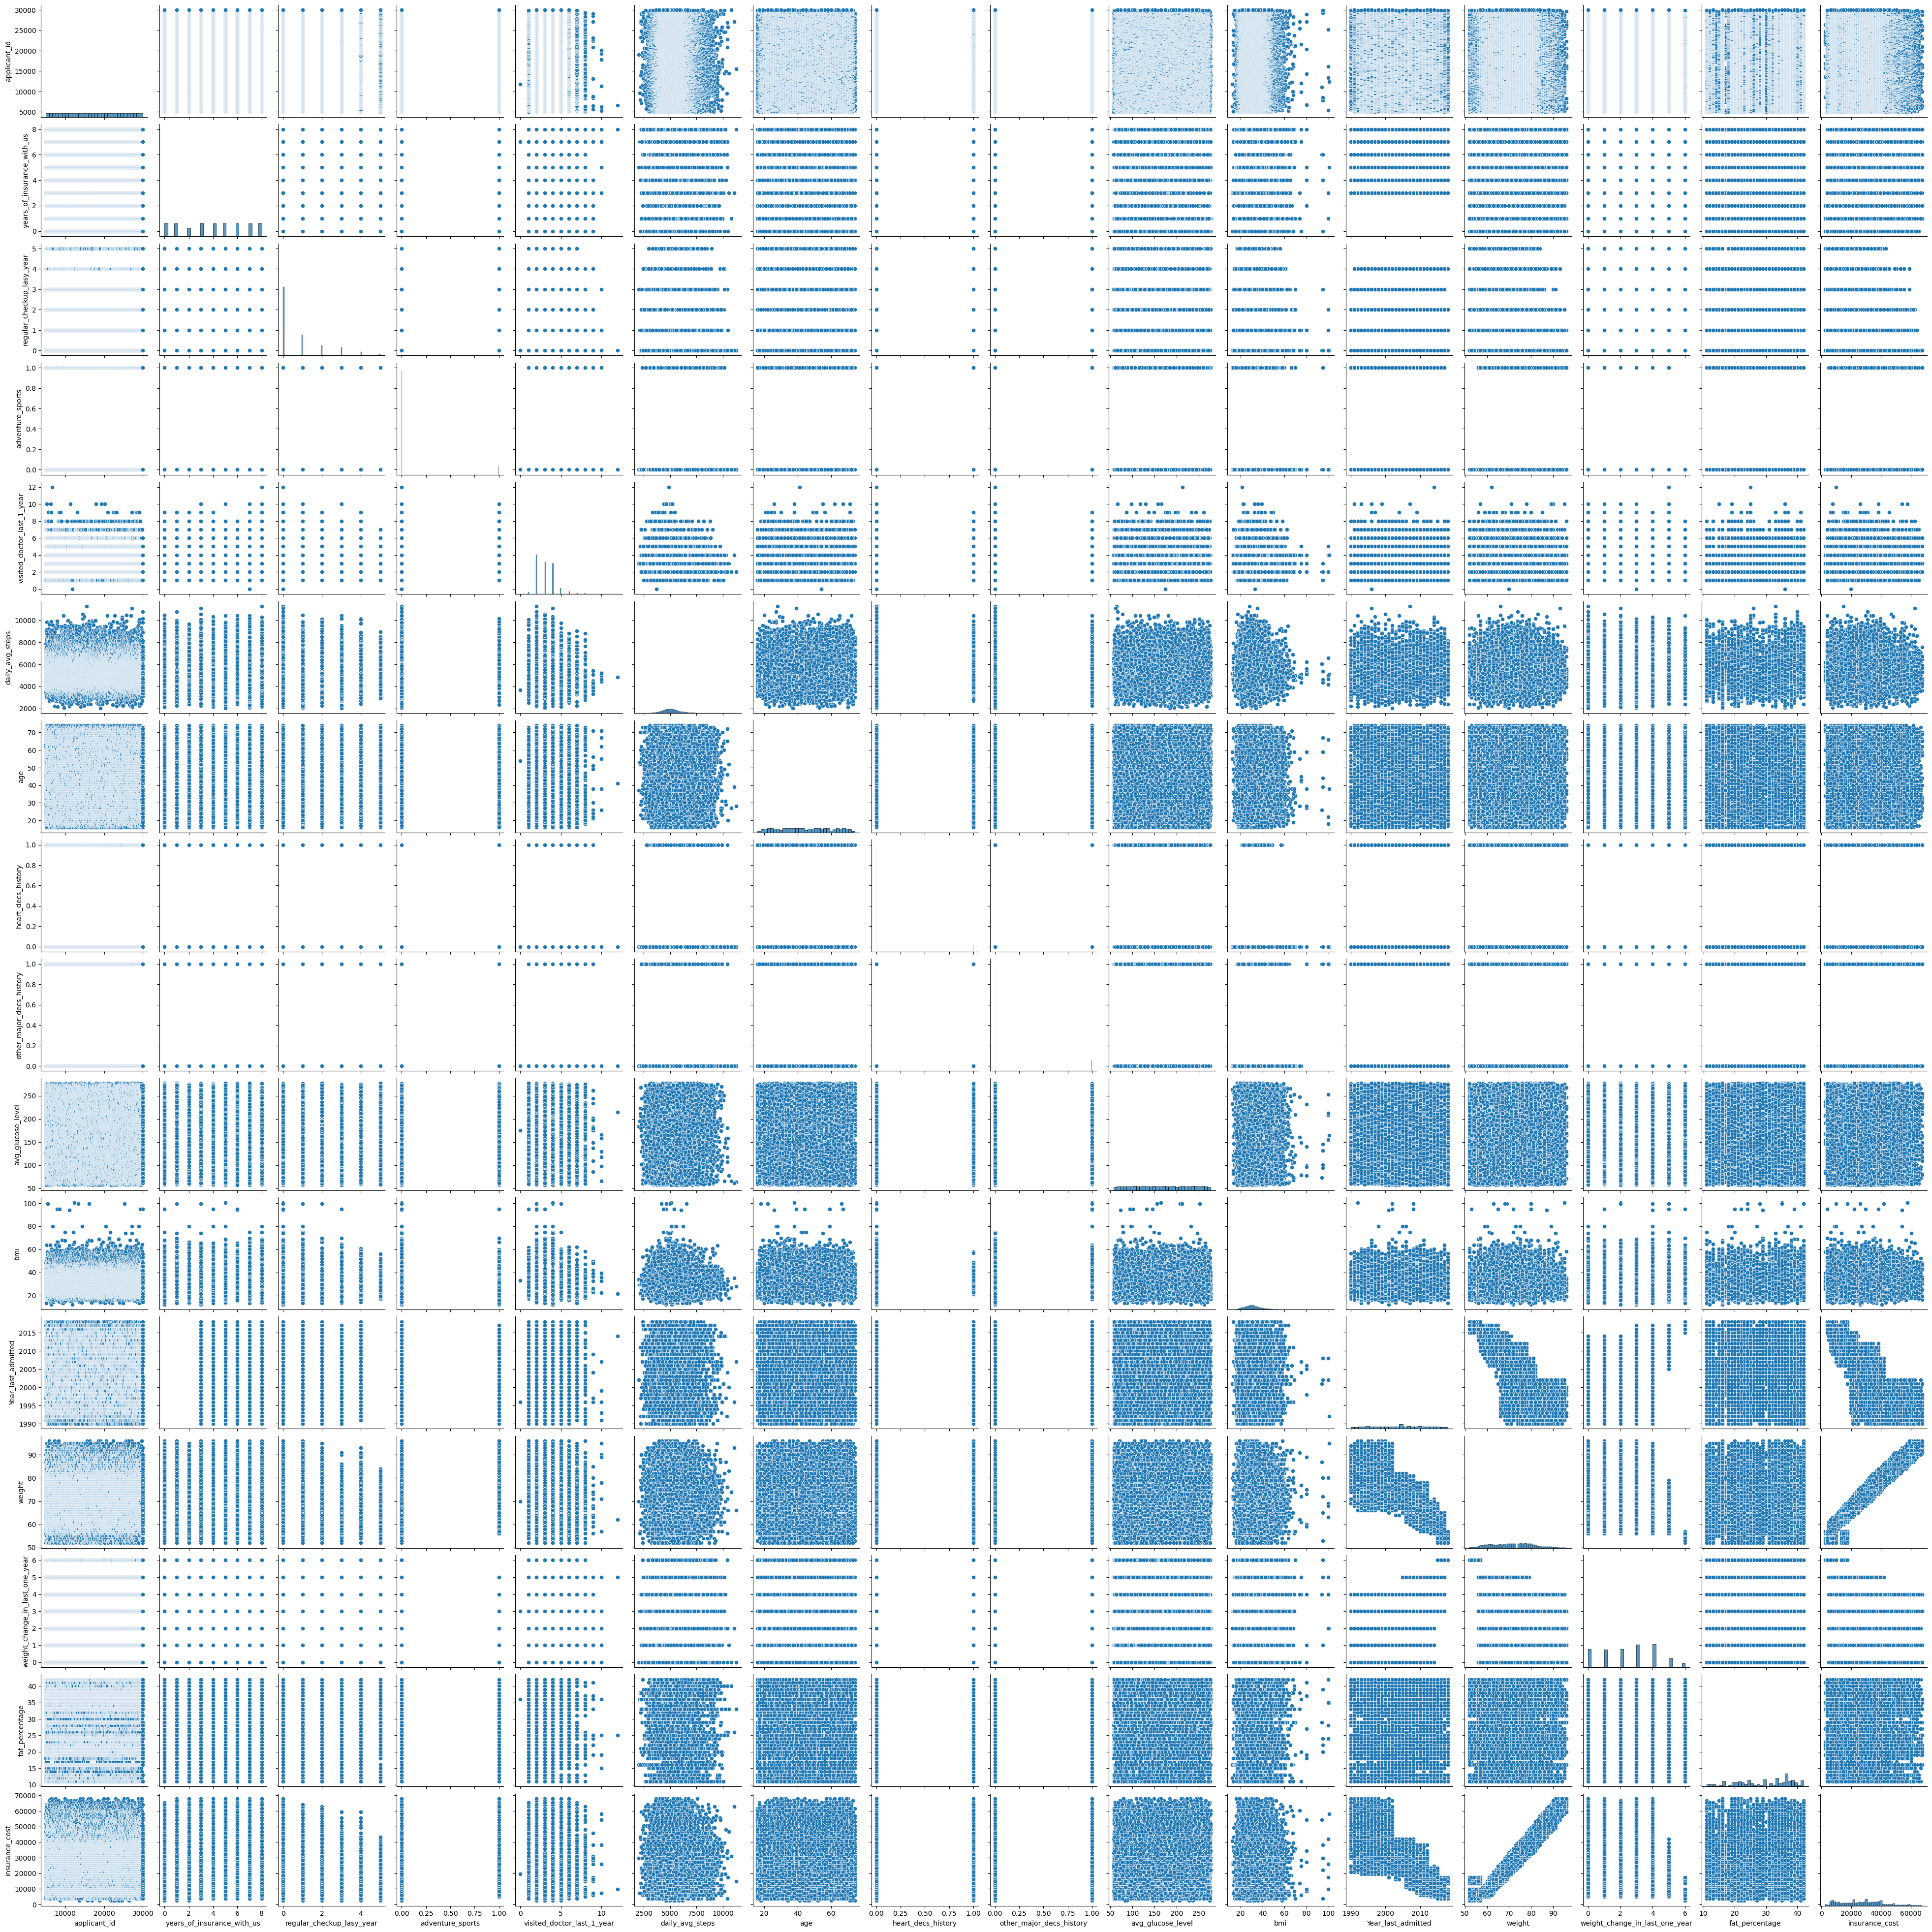

In [15]:

# Pairplot for relationships

sns.pairplot(df[num_cols])
plt.show()


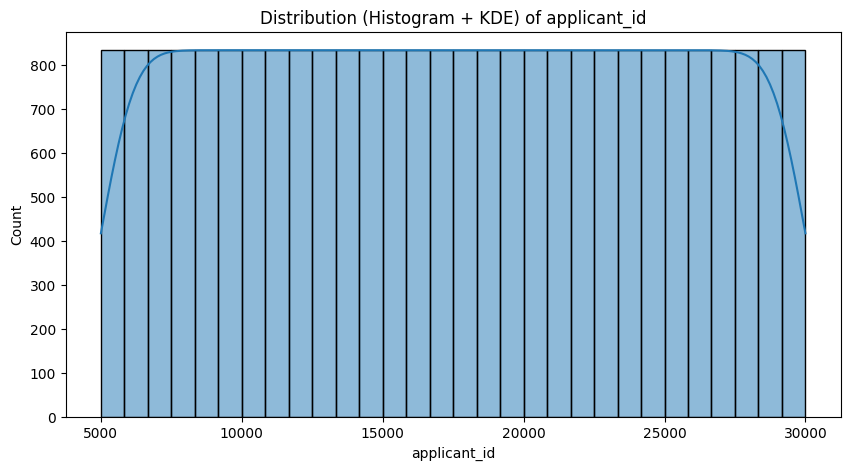

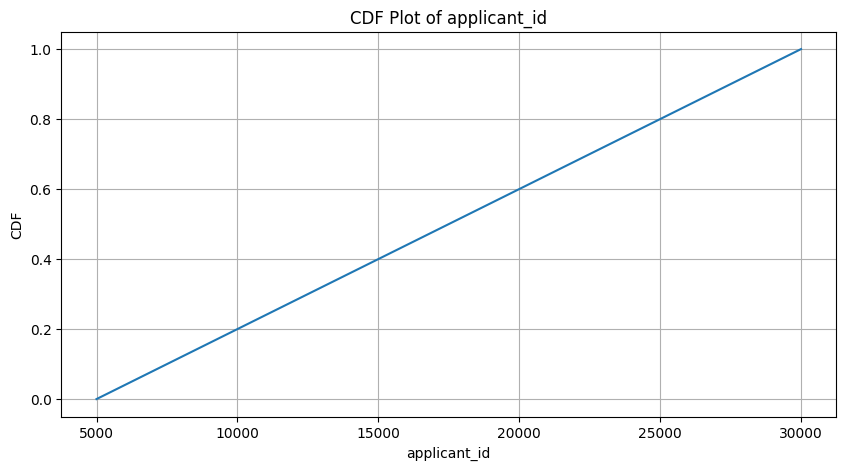

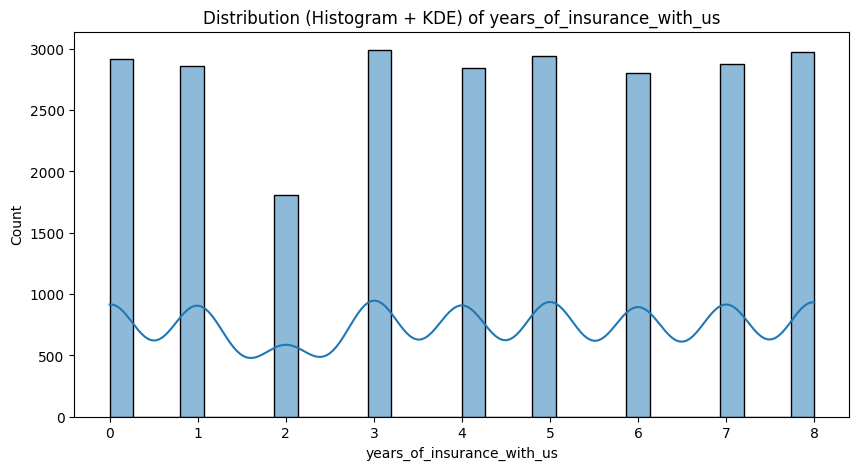

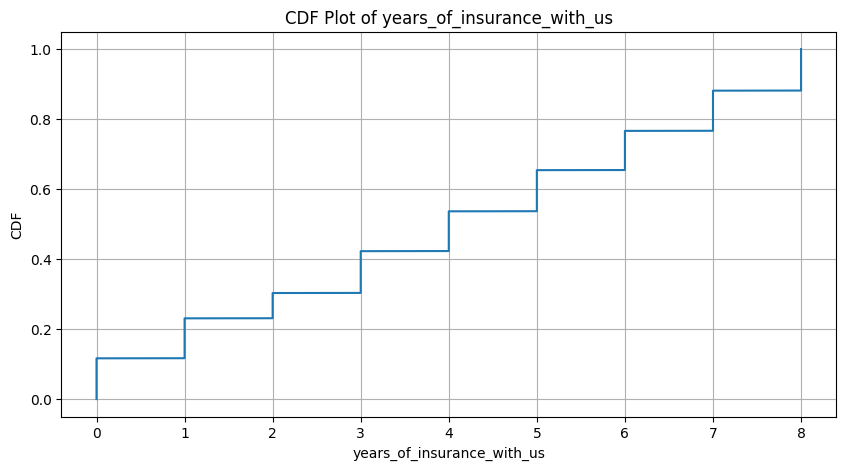

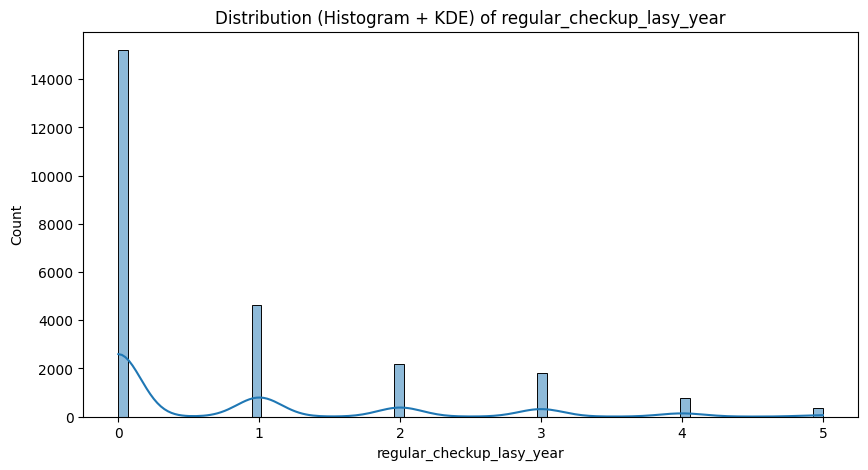

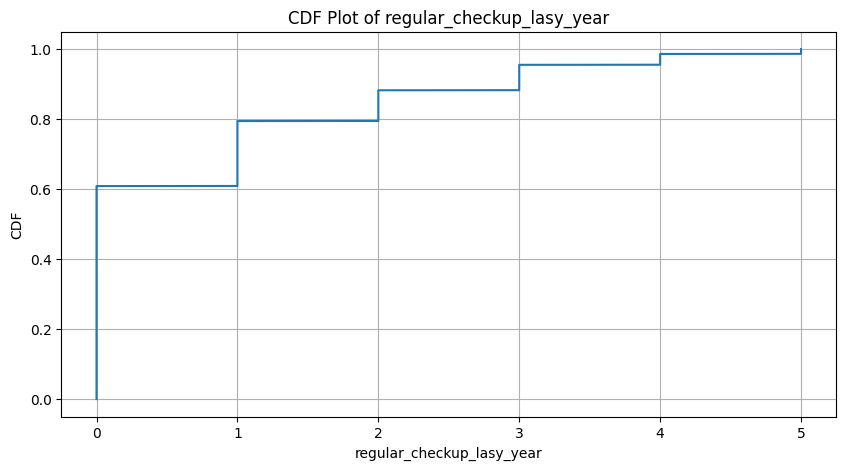

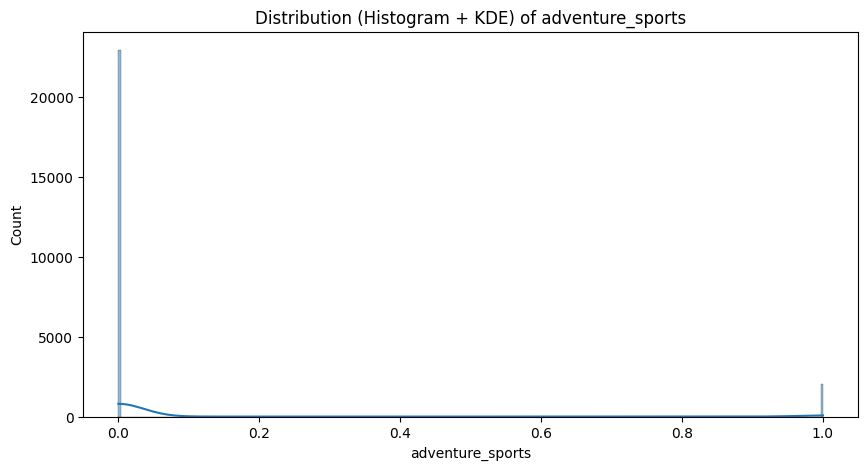

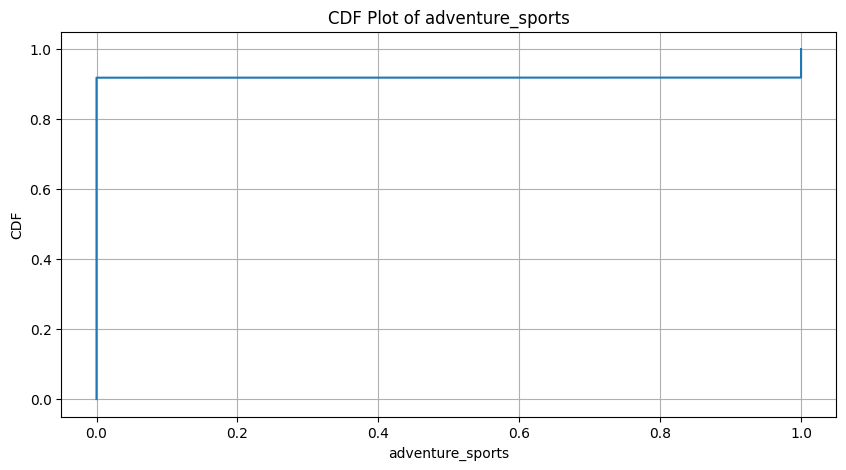

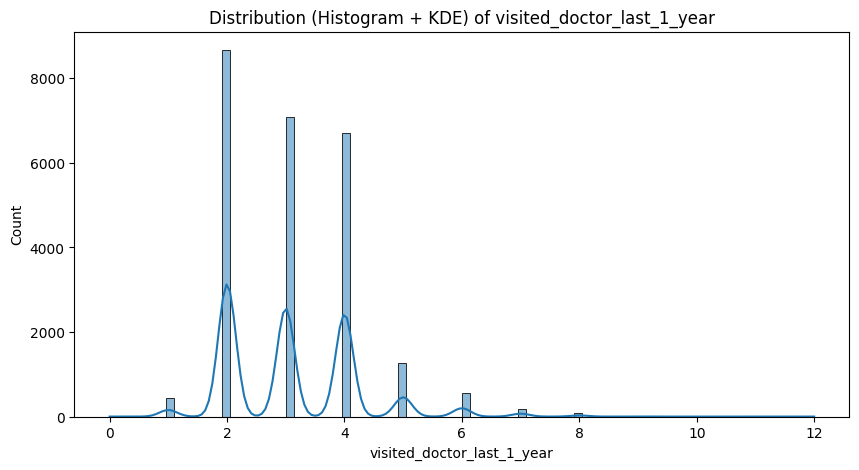

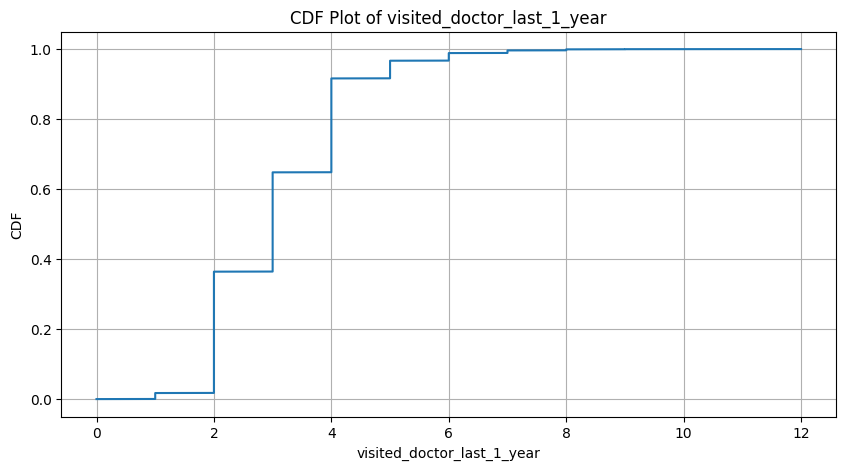

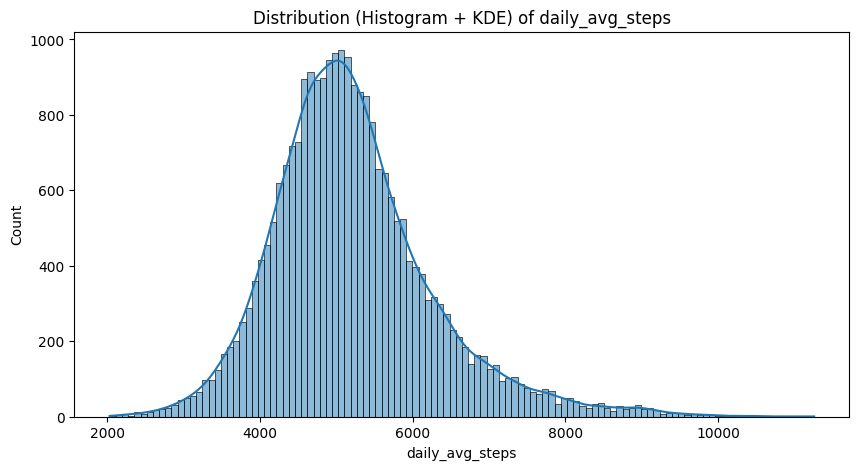

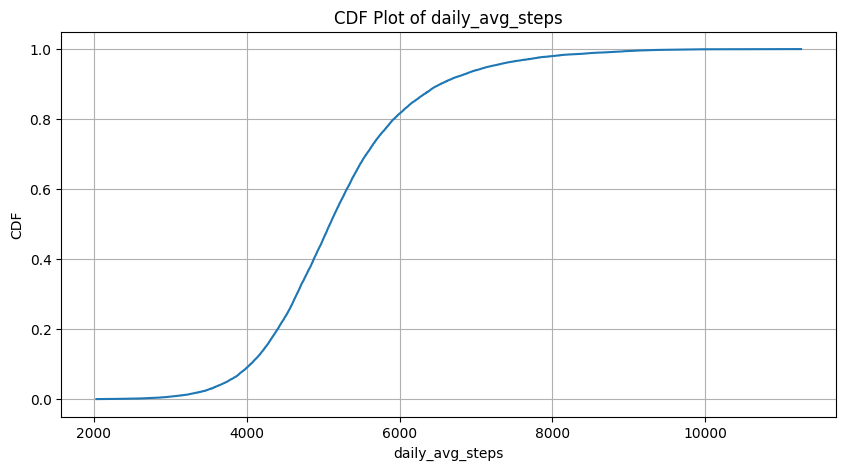

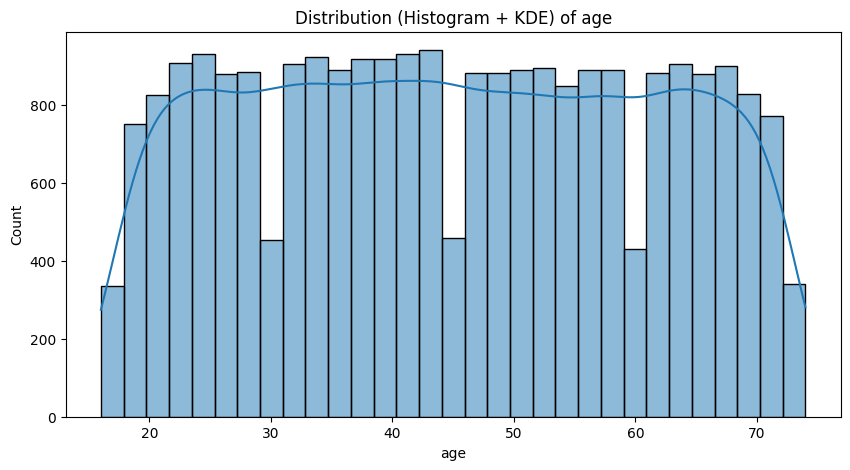

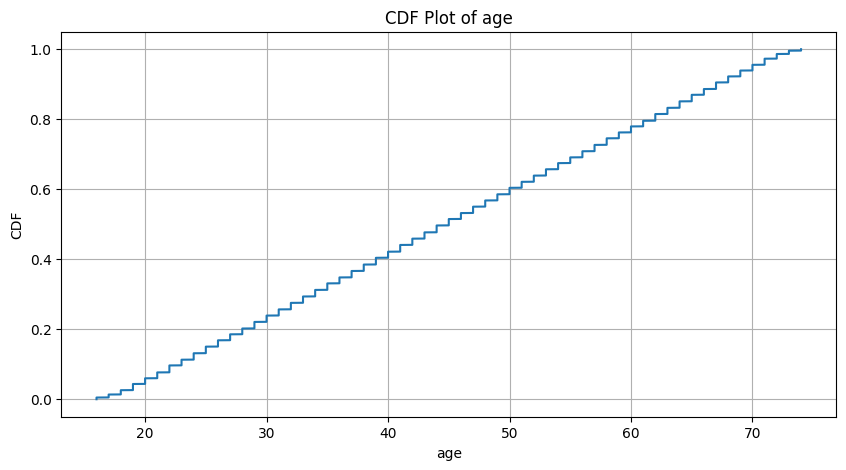

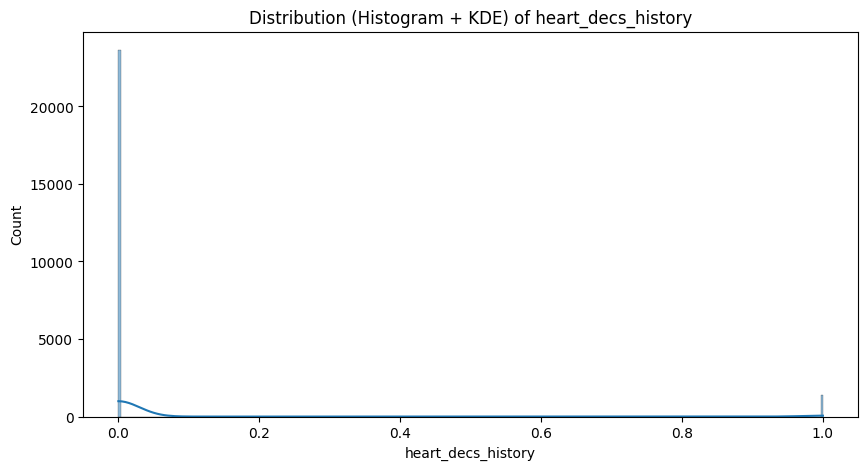

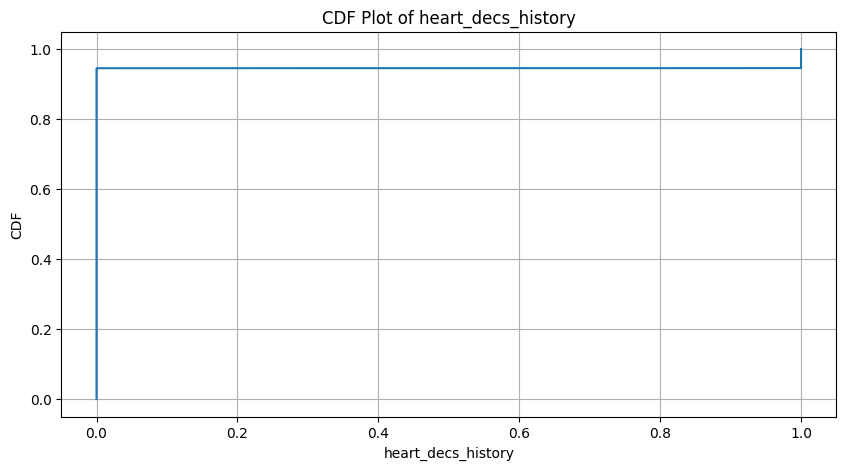

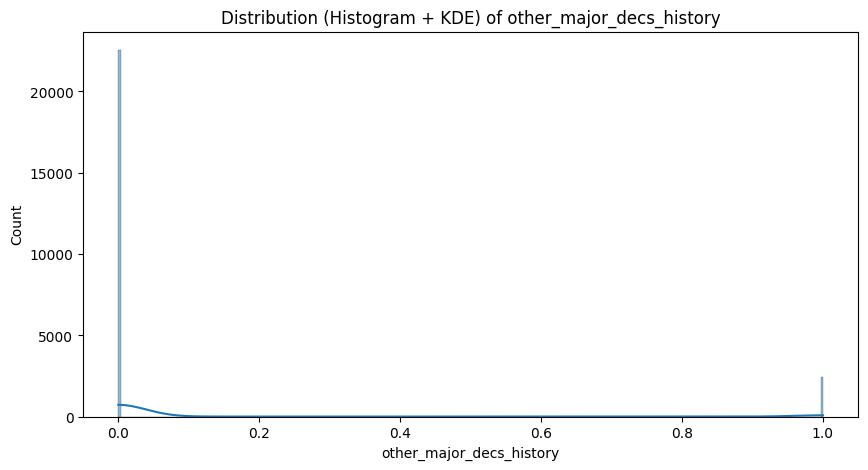

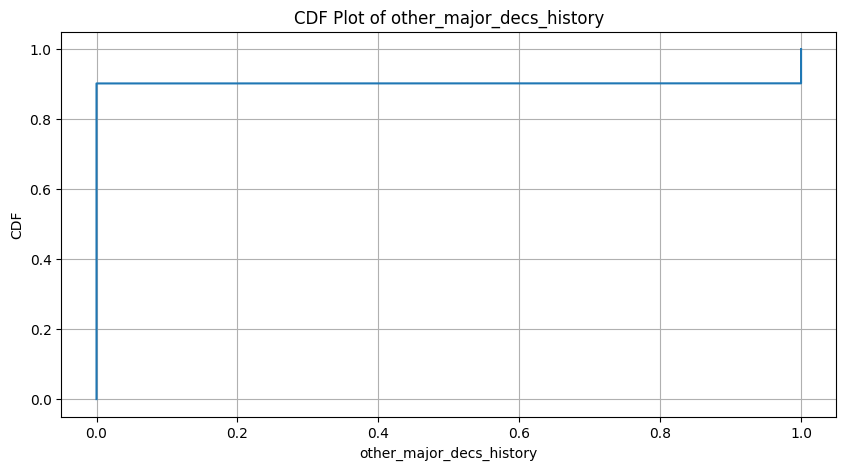

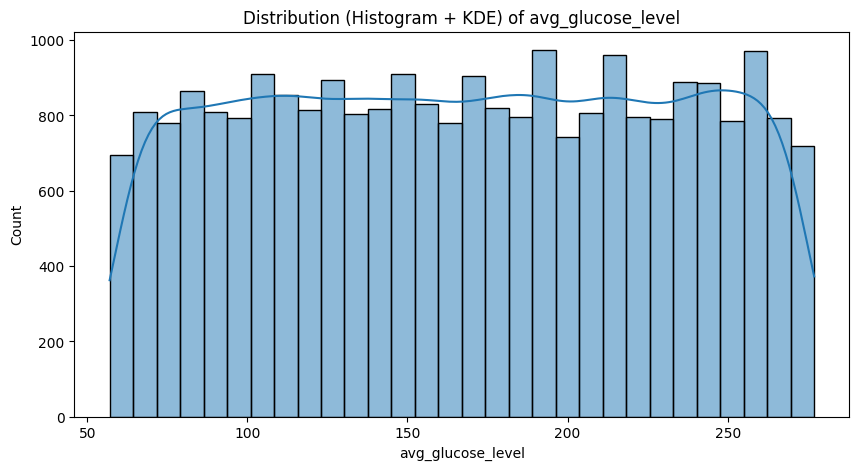

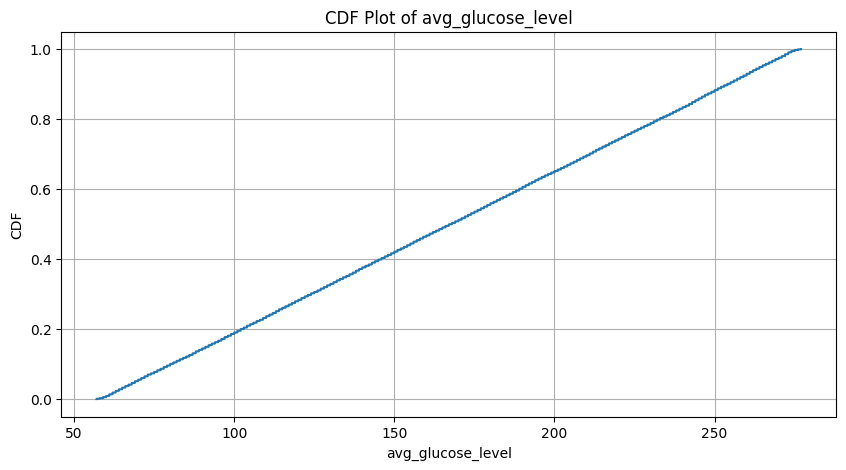

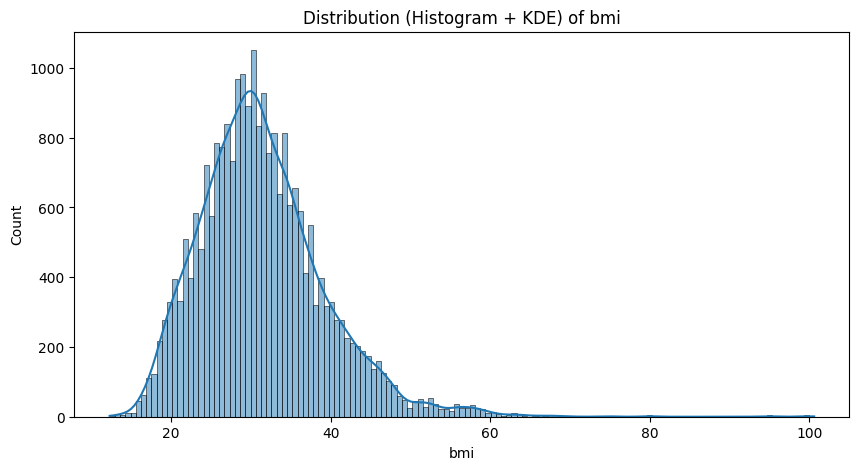

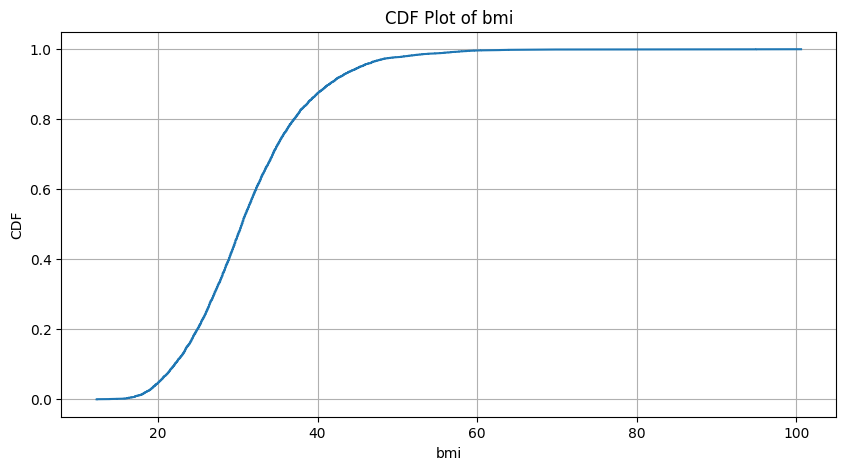

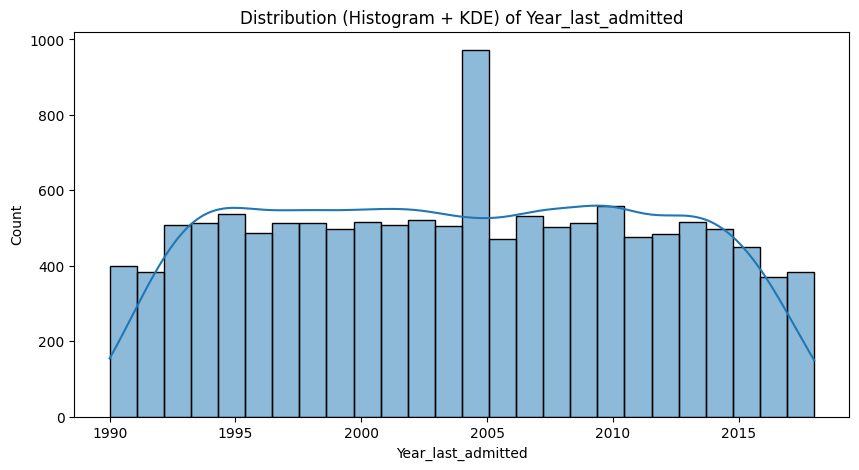

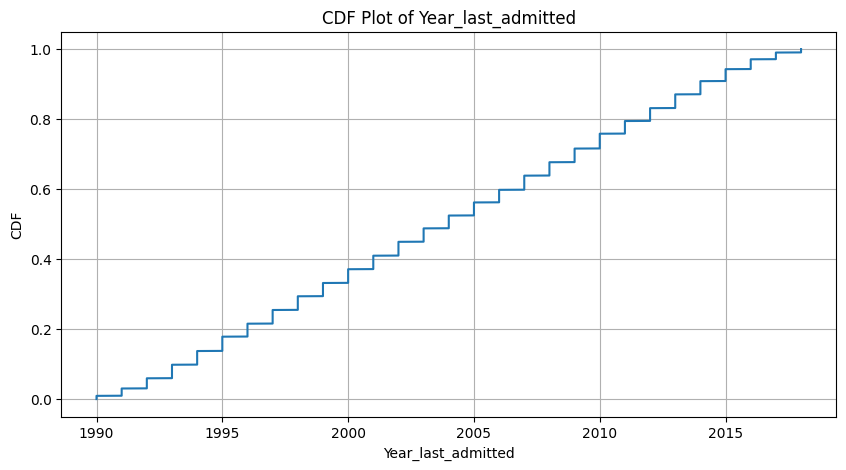

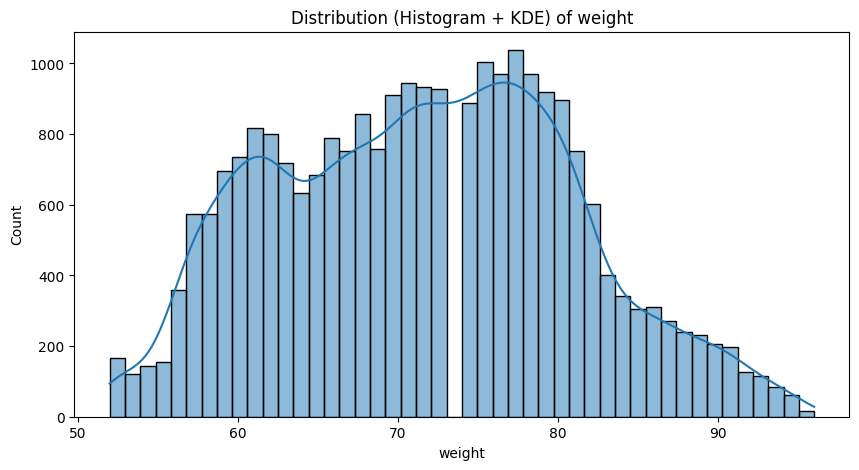

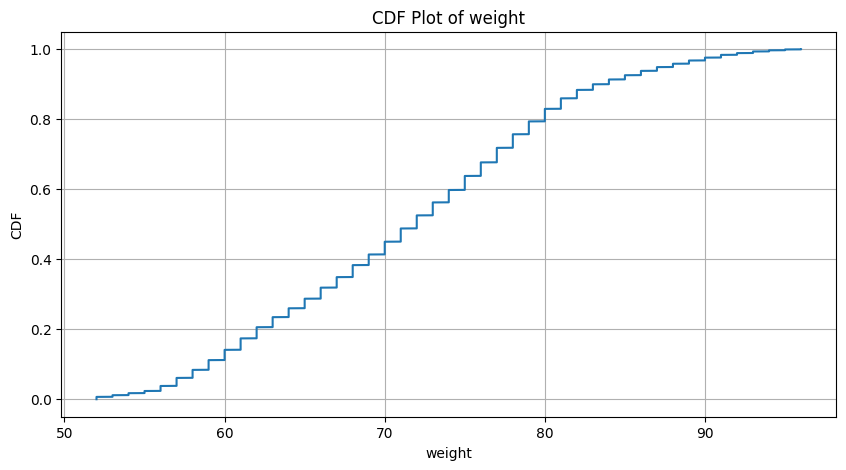

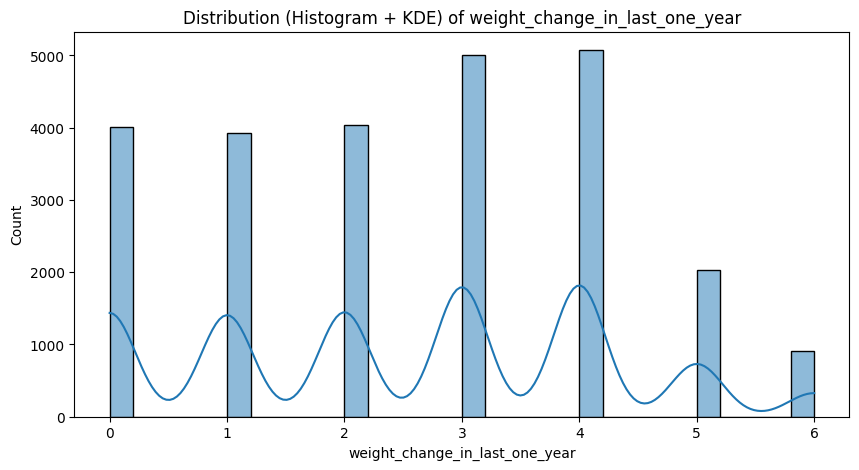

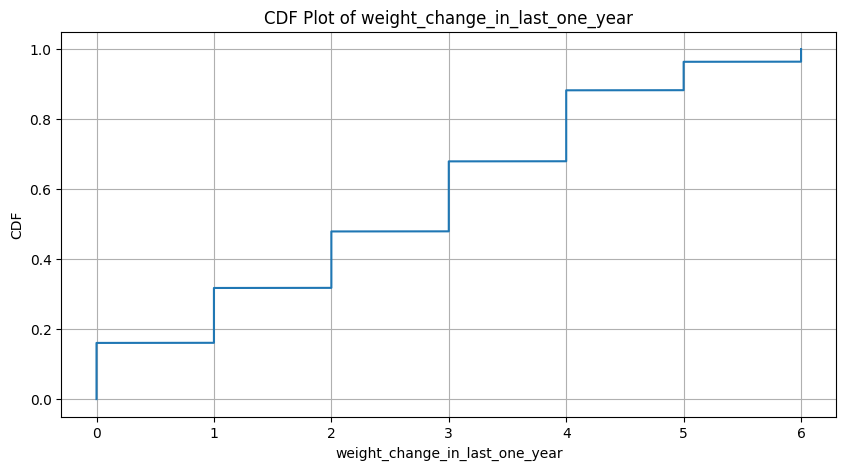

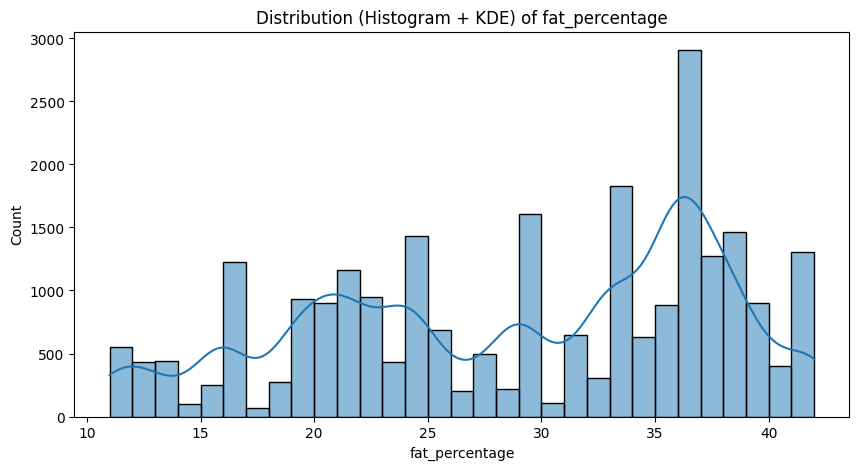

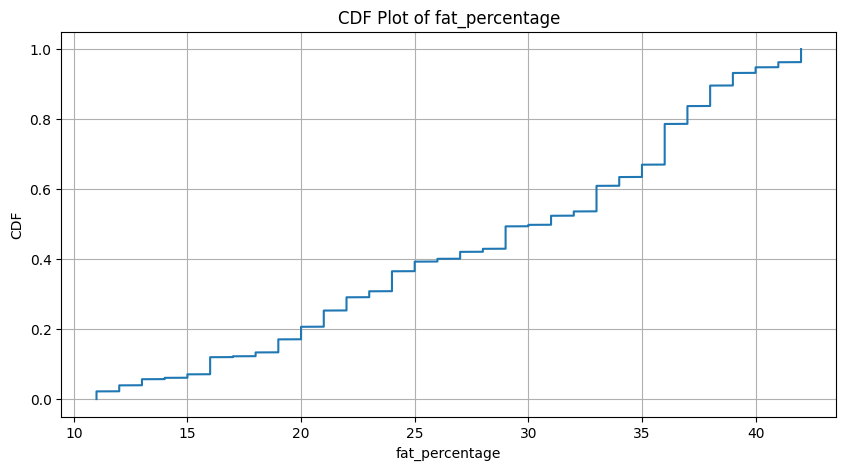

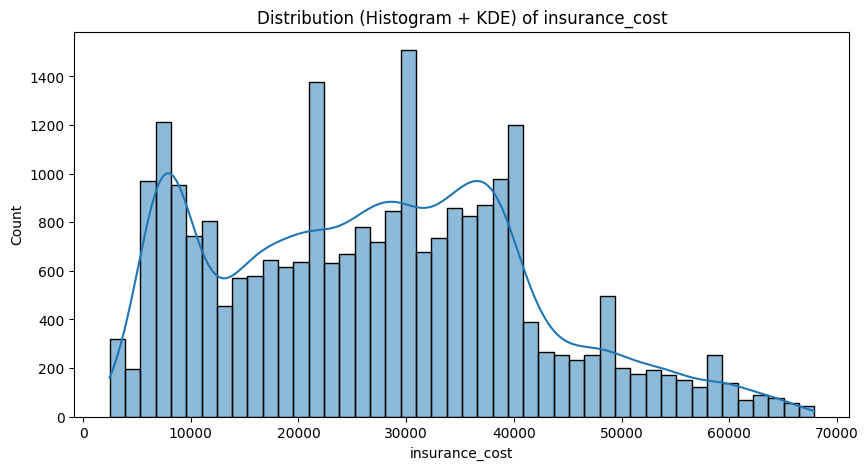

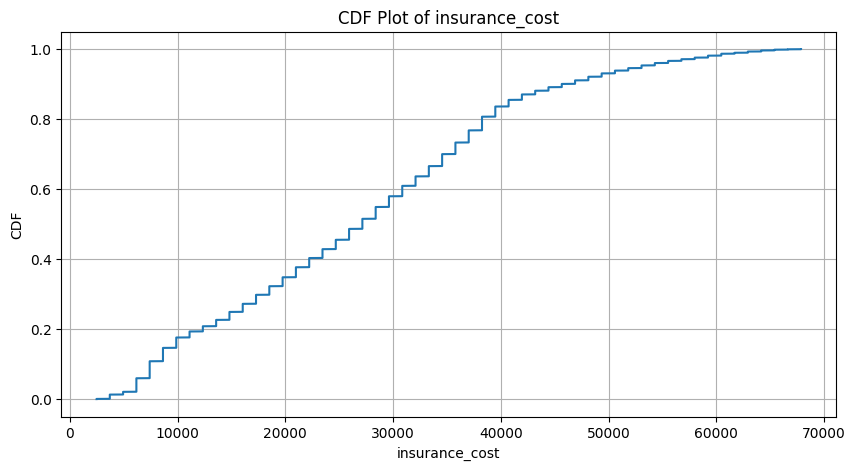

In [17]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Distribution Plots

for col in num_cols:
    plt.figure()

    # Histogram + KDE distribution
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution (Histogram + KDE) of {col}")
    plt.show()

    # CDF Plot 
    plt.figure()
    sorted_vals = np.sort(df[col].dropna())
    cdf = np.arange(len(sorted_vals))/float(len(sorted_vals))
    plt.plot(sorted_vals, cdf)
    plt.title(f"CDF Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("CDF")
    plt.grid()
    plt.show()


Target is continuous
Skewness of insurance_cost: 0.3316500625115993
The data is fairly balanced


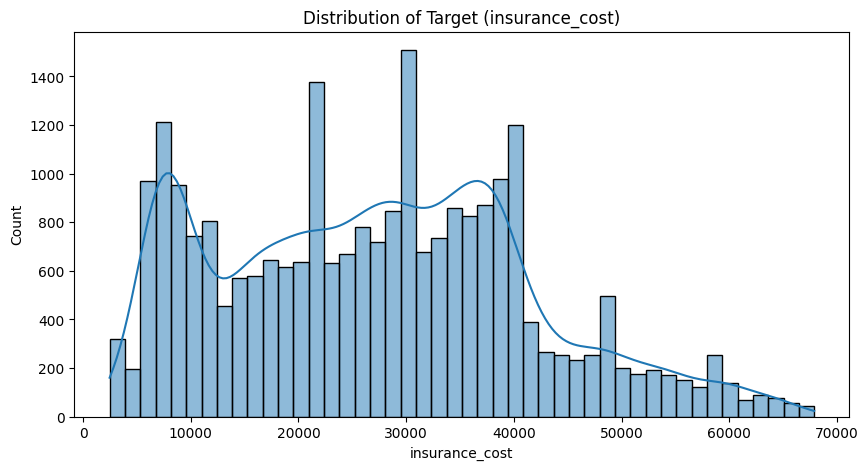

In [18]:
# Skewness Analysis of Target Variable

target = "insurance_cost"

if df[target].dtype != "object":
    print("Target is continuous")

    skew_value = df[target].skew()
    print(f"Skewness of {target}: {skew_value}")

    if skew_value > 1:
        print("The data is highly positively skewed")
    elif skew_value < -1:
        print("The data is highly negatively skewed")
    else:
        print("The data is fairly balanced")

    # Plot distribution of target
    plt.figure()
    sns.histplot(df[target], kde=True)
    plt.title(f"Distribution of Target ({target})")
    plt.show()

In [20]:
# Remove all rows containing null value
df = df.dropna()

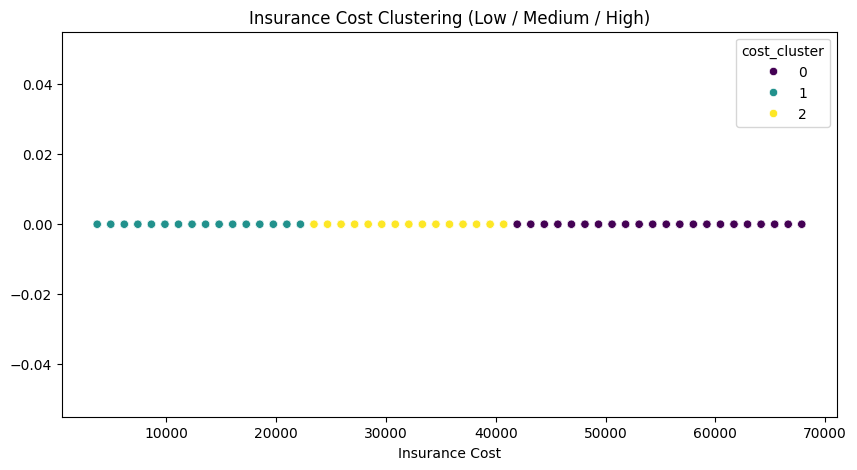

min    max          mean
cost_cluster                            
0             41956  67870  51232.658390
1              3702  22212  13194.749709
2             23446  40722  32554.579160

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

target = "insurance_cost"

X = df[[target]]   

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cost_cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df[target], y=[0]*len(df), hue=df["cost_cluster"], palette="viridis")
plt.title("Insurance Cost Clustering (Low / Medium / High)")
plt.xlabel("Insurance Cost")
plt.show()

df.groupby("cost_cluster")[target].agg(["min", "max", "mean"])
